# Resumen
Realice un informe en el que presente los resultados obtenidos al implementar un modelo regresión lineal.

In [96]:
# Librerías
library(readxl)
library(car)
library(explore)
library(psych)
library(corrplot)
library(readr)
library(GGally)
library(leaps)
library(lmtest)
library(faraway)
library(MASS)
library(dplyr)

In [94]:
options(scipen = 999)

# Resultado de la exploracion de datos

In [115]:
ruta_train <- "Train real state.csv"
ruta_test <- "Test real state.csv"
train <- read_csv(ruta_train)

options(width = 200)

train <- train %>%
    dplyr::select(-starts_with("..."))

#train %>% dplyr::select(-dplyr::starts_with("..."))


dim(train)
# names(train) <- make.names((names(train)))

#train <- train %>% mutate((across(where(is.character), as.factor)))

glimpse(train)

New names:
• `` -> `...1`
Rows: 4124 Columns: 31
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): HallwayType, HeatingType, AptManageType, TimeToBusStop, TimeToSubway, SubwayStation
dbl (25): ...1, SalePrice, YearBuilt, YrSold, MonthSold, Size.sqf., Floor, N_Parkinglot.Ground., N_Parkinglot.Basement., N_APT, N_manager, N_elevators, N_FacilitiesNearBy.PublicOffice., N_Faciliti...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 4124   30

Rows: 4,124
Columns: 30
$ SalePrice                          <dbl> 141592, 51327, 48672, 221238, 78318, 61946, 83185, 168141, 153982, 200884, 60176, 185840, 120796, 176991, 55752, 92035, 181061, 198230, 185840, 448672, 167…
$ YearBuilt                          <dbl> 2006, 1985, 1985, 1993, 1992, 1993, 1992, 1986, 1986, 2007, 1985, 1993, 1993, 1993, 1992, 1993, 2007, 2007, 2007, 2007, 2006, 2007, 1997, 1985, 1993, 1993,…
$ YrSold                             <dbl> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007,…
$ MonthSold                          <dbl> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 1…
$ Size.sqf.                          <dbl> 814, 587, 587, 1761, 644, 644, 644, 1377, 914, 868, 587, 1288, 914, 1451, 576, 644, 868, 868, 868, 1643, 903, 868, 644, 676, 1761, 91

In [98]:
conflicts()


[1] "happy"           "%+%"             "alpha"           "logit"           "describe"        "rescale01"       "logit"           "vif"             "%>%"             "as_label"       
[11] "enexpr"          "enexprs"         "enquo"           "enquos"          "ensym"           "ensyms"          "expr"            "quo"             "quo_name"        "quos"           
[21] "recode"          "select"          "sym"             "syms"            "vars"            "filter"          "lag"             "edit"            "View"            "npk"            
[31] "as.Date"         "as.Date.numeric" "body<-"          "intersect"       "kronecker"       "plot"            "Position"        "setdiff"         "setequal"        "union"

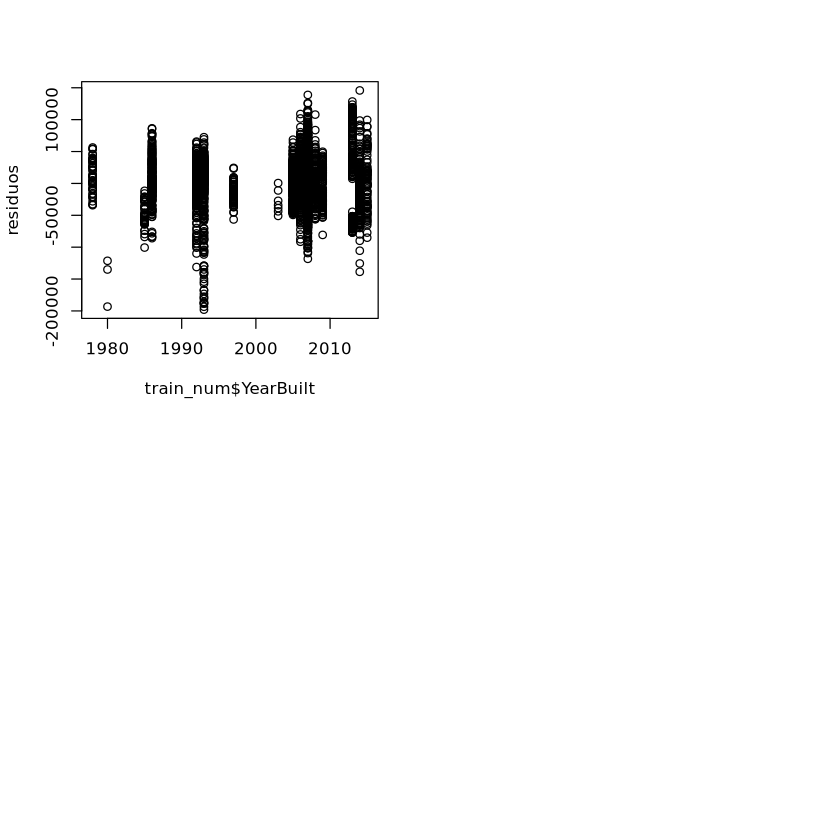

In [100]:
par(mfrow = c(2, 2))
plot(y=residuos,x=train_num$YearBuilt)

In [116]:
# Eliminando columnas
train_num <- train %>% dplyr::select(-MonthSold, -N_SchoolNearBy.High., -N_SchoolNearBy.Middle., -HallwayType, -HeatingType, -AptManageType, -TimeToBusStop, -TimeToSubway, -SubwayStation)

glimpse(train_num)


Rows: 4,124
Columns: 21
$ SalePrice                          <dbl> 141592, 51327, 48672, 221238, 78318, 61946, 83185, 168141, 153982, 200884, 60176, 185840, 120796, 176991, 55752, 92035, 181061, 198230, 185840, 448672, 167…
$ YearBuilt                          <dbl> 2006, 1985, 1985, 1993, 1992, 1993, 1992, 1986, 1986, 2007, 1985, 1993, 1993, 1993, 1992, 1993, 2007, 2007, 2007, 2007, 2006, 2007, 1997, 1985, 1993, 1993,…
$ YrSold                             <dbl> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007,…
$ Size.sqf.                          <dbl> 814, 587, 587, 1761, 644, 644, 644, 1377, 914, 868, 587, 1288, 914, 1451, 576, 644, 868, 868, 868, 1643, 903, 868, 644, 676, 1761, 914, 355, 355, 644, 914,…
$ Floor                              <dbl> 3, 8, 6, 3, 2, 10, 13, 4, 11, 18, 7, 24, 2, 1, 1, 20, 18, 12, 3, 39, 10, 13, 15, 7, 15, 9, 5, 1, 18, 16, 7, 11, 12, 8, 14, 8, 7, 16, 

In [ ]:
# Despues quiero incluir las variables categoricas en el modelo, POR AHORA SOLO VOY A SEGUIR CON LAS NUMERICAS
# train$HallwayType_cod <- as.numeric(factor(train$HallwayType))
# train$HallwayType_cod <- as.numeric(factor(train$HeatingType))
# glimpse(train)

In [117]:
# Se eliminan las siguientes columnas para reducir la explicación del modelo, ya que las columnas eliminadas pueden ser explicadas por otras como se muestra en la 
#matriz de correlación
train_red <- train_num %>% dplyr::select(-N_SchoolNearBy.Total., -N_FacilitiesNearBy.Total., -N_SchoolNearBy.University., -N_FacilitiesNearBy.ETC., -N_FacilitiesNearBy.PublicOffice.)

glimpse(train_red)

Rows: 4,124
Columns: 16
$ SalePrice                          <dbl> 141592, 51327, 48672, 221238, 78318, 61946, 83185, 168141, 153982, 200884, 60176, 185840, 120796, 176991, 55752, 92035, 181061, 198230, 185840, 448672, 167…
$ YearBuilt                          <dbl> 2006, 1985, 1985, 1993, 1992, 1993, 1992, 1986, 1986, 2007, 1985, 1993, 1993, 1993, 1992, 1993, 2007, 2007, 2007, 2007, 2006, 2007, 1997, 1985, 1993, 1993,…
$ YrSold                             <dbl> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007,…
$ Size.sqf.                          <dbl> 814, 587, 587, 1761, 644, 644, 644, 1377, 914, 868, 587, 1288, 914, 1451, 576, 644, 868, 868, 868, 1643, 903, 868, 644, 676, 1761, 914, 355, 355, 644, 914,…
$ Floor                              <dbl> 3, 8, 6, 3, 2, 10, 13, 4, 11, 18, 7, 24, 2, 1, 1, 20, 18, 12, 3, 39, 10, 13, 15, 7, 15, 9, 5, 1, 18, 16, 7, 11, 12, 8, 14, 8, 7, 16, 

# Selección de las variables del modelo (20 puntos)

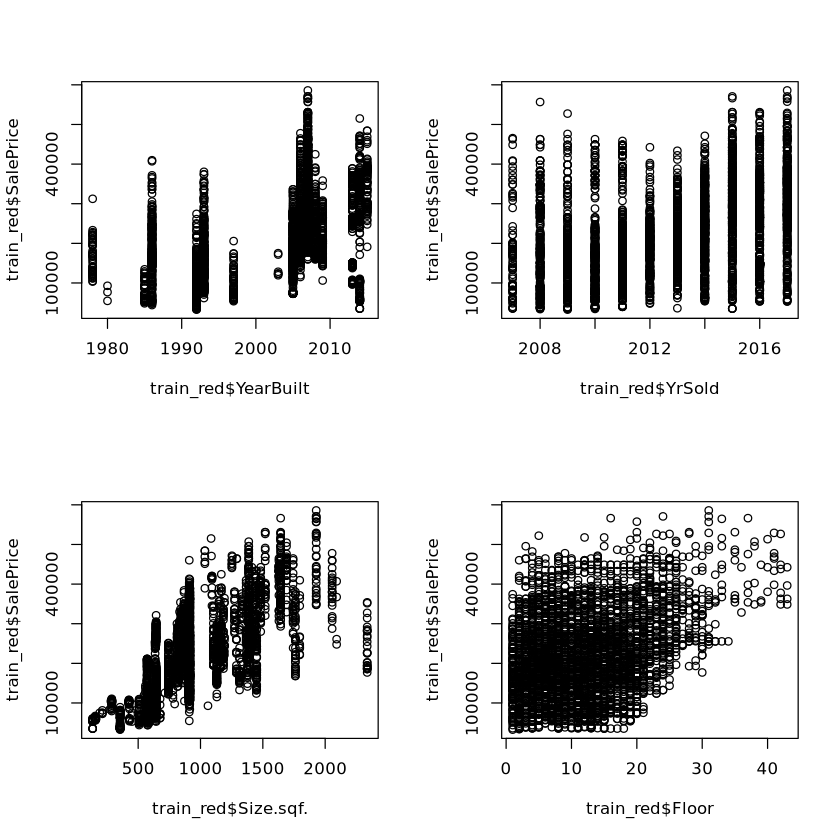

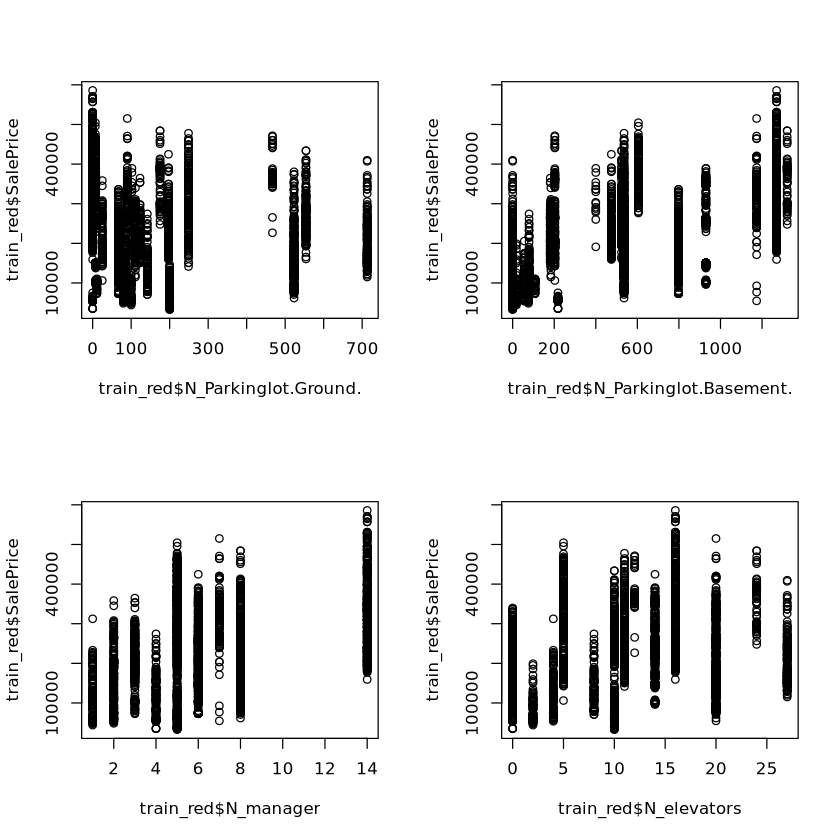

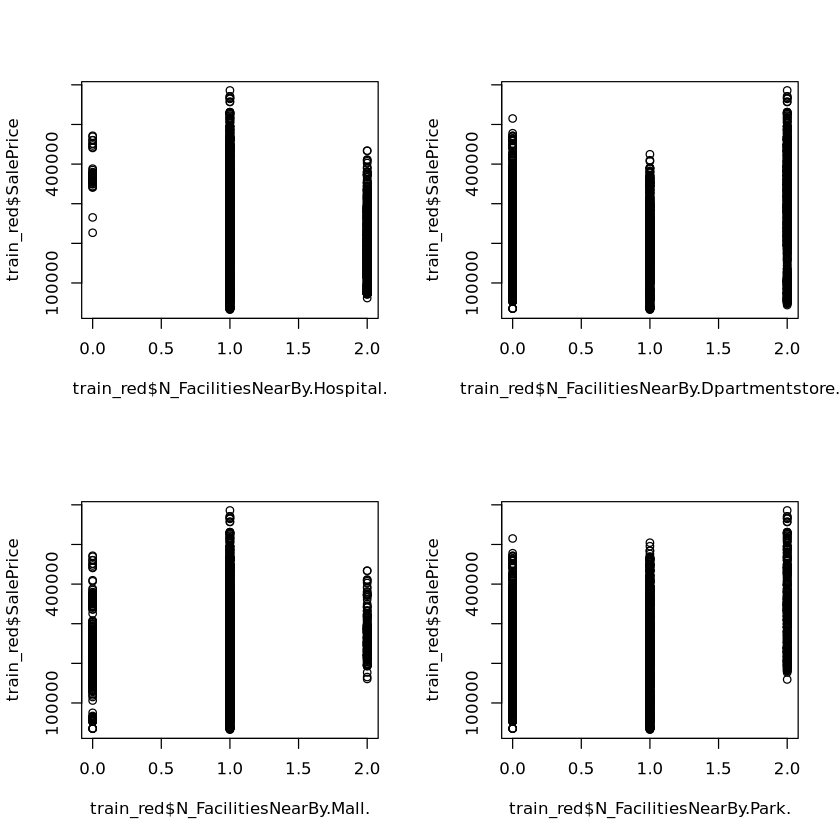

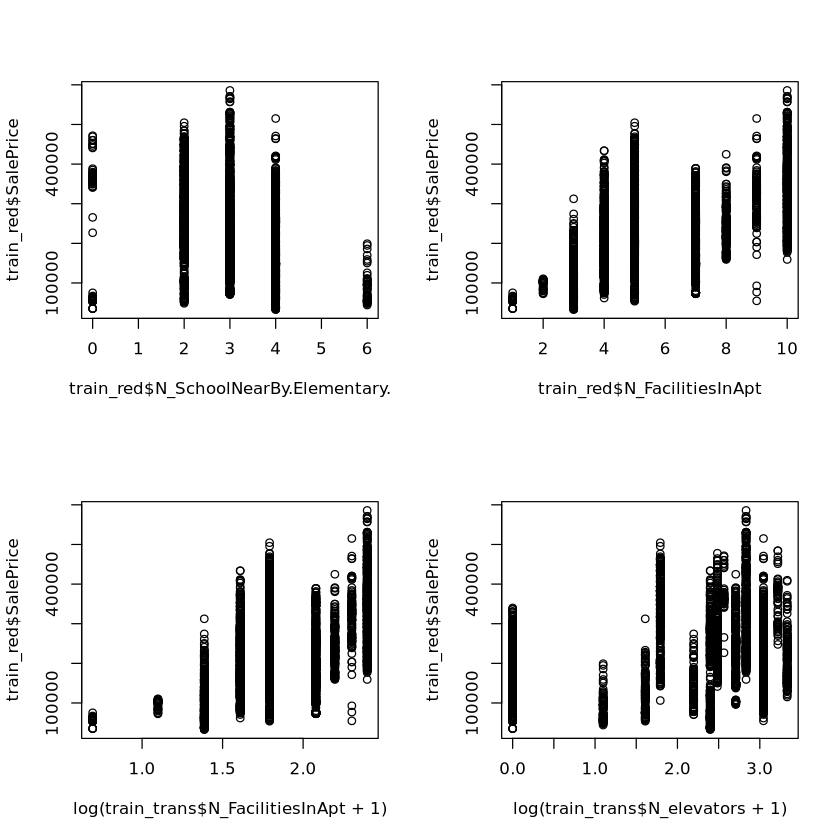

In [ ]:
par(mfrow = c(2, 2))
plot(y=train_red$SalePrice,x=train_red$YearBuilt)
plot(y=train_red$SalePrice,x=train_red$YrSold)
plot(y=train_red$SalePrice,x=train_red$Size.sqf.)
plot(y=train_red$SalePrice,x=train_red$Floor)

plot(y=train_red$SalePrice,x=train_red$N_Parkinglot.Ground.)
plot(y=train_red$SalePrice,x=train_red$N_Parkinglot.Basement.)
plot(y=train_red$SalePrice,x=train_red$N_manager)
plot(y=train_red$SalePrice,x=train_red$N_elevators)

plot(y=train_red$SalePrice,x=train_red$N_FacilitiesNearBy.Hospital.)
plot(y=train_red$SalePrice,x=train_red$N_FacilitiesNearBy.Dpartmentstore.) .
plot(y=train_red$SalePrice,x=train_red$N_FacilitiesNearBy.Mall.)
plot(y=train_red$SalePrice,x=train_red$N_FacilitiesNearBy.Park.)

plot(y=train_red$SalePrice,x=train_red$N_SchoolNearBy.Elementary.)
plot(y=train_red$SalePrice,x=train_red$N_FacilitiesInApt)
plot(y=train_red$SalePrice,x=log(train_trans$N_FacilitiesInApt + 1))
plot(y=train_red$SalePrice,x=log(train_trans$N_elevators + 1))

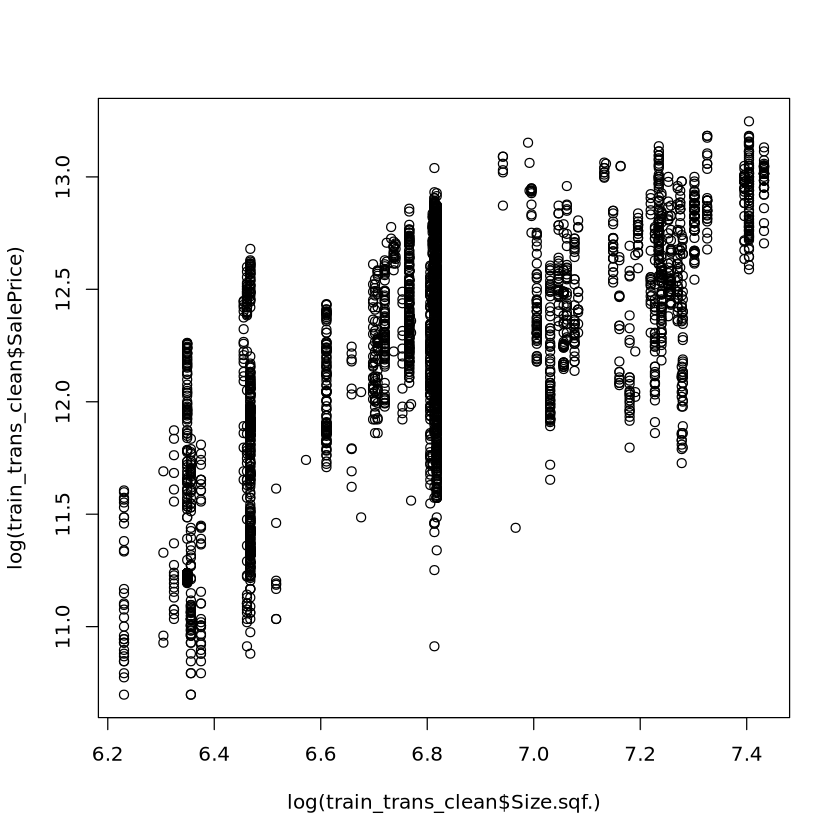

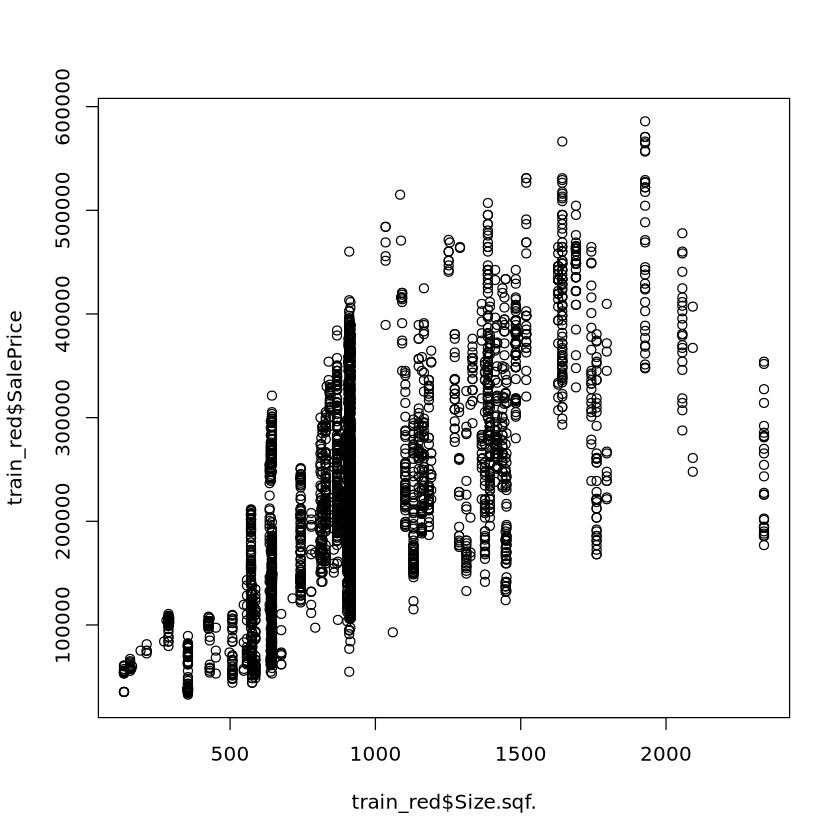

In [194]:
plot(y=log(train_trans_clean$SalePrice),x=log(train_trans_clean$Size.sqf.))
plot(y=train_red$SalePrice,x=train_red$Size.sqf.)

In [ ]:
#train_trans <- train_red %>% dplyr::select(-N_FacilitiesNearBy.Hospital.)

In [167]:
train_trans <- train_red %>%
  mutate(
    across(
      c(N_FacilitiesNearBy.Mall., 
        N_FacilitiesNearBy.Dpartmentstore., 
        N_FacilitiesNearBy.Park.,
         N_FacilitiesNearBy.Hospital.),
      as.factor
    )
  )

glimpse(train_trans)

Rows: 4,124
Columns: 16
$ SalePrice                          <dbl> 141592, 51327, 48672, 221238, 78318, 61946, 83185, 168141, 153982, 200884, 60176, 185840, 120796, 176991, 55752, 92035, 181061, 198230, 185840, 448672, 167…
$ YearBuilt                          <dbl> 2006, 1985, 1985, 1993, 1992, 1993, 1992, 1986, 1986, 2007, 1985, 1993, 1993, 1993, 1992, 1993, 2007, 2007, 2007, 2007, 2006, 2007, 1997, 1985, 1993, 1993,…
$ YrSold                             <dbl> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007,…
$ Size.sqf.                          <dbl> 814, 587, 587, 1761, 644, 644, 644, 1377, 914, 868, 587, 1288, 914, 1451, 576, 644, 868, 868, 868, 1643, 903, 868, 644, 676, 1761, 914, 355, 355, 644, 914,…
$ Floor                              <dbl> 3, 8, 6, 3, 2, 10, 13, 4, 11, 18, 7, 24, 2, 1, 1, 20, 18, 12, 3, 39, 10, 13, 15, 7, 15, 9, 5, 1, 18, 16, 7, 11, 12, 8, 14, 8, 7, 16, 

[1] 556637 527433 513274 570796 530973 566371 530973 526548 517699 517699 530973 529203 526548 522123 564601 529203 566371 515929 585840 515044 526548 522123 557522 570796 511504

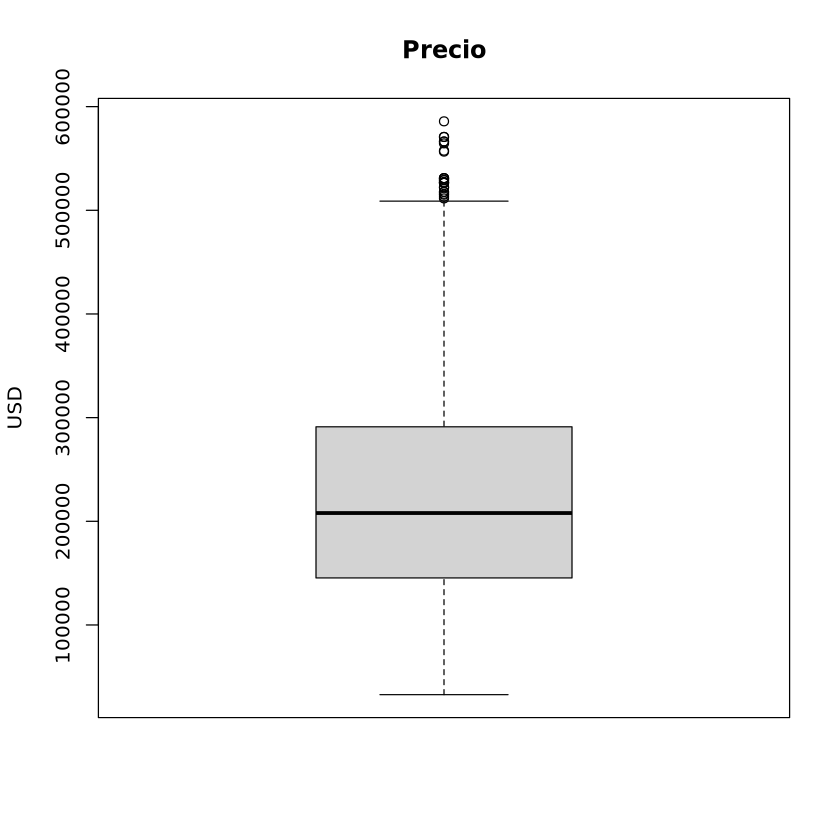

In [161]:
boxplot(train_trans$SalePrice, main = "Precio", ylab = "USD")$out

In [ ]:
p1 <- quantile(train_trans$SalePrice, 0.01)
p99 <- quantile(train_trans$SalePrice, 0.99)

train_trans_clean <- subset(train_trans, SalePrice >= p1 & SalePrice <= p99)


numeric(0)

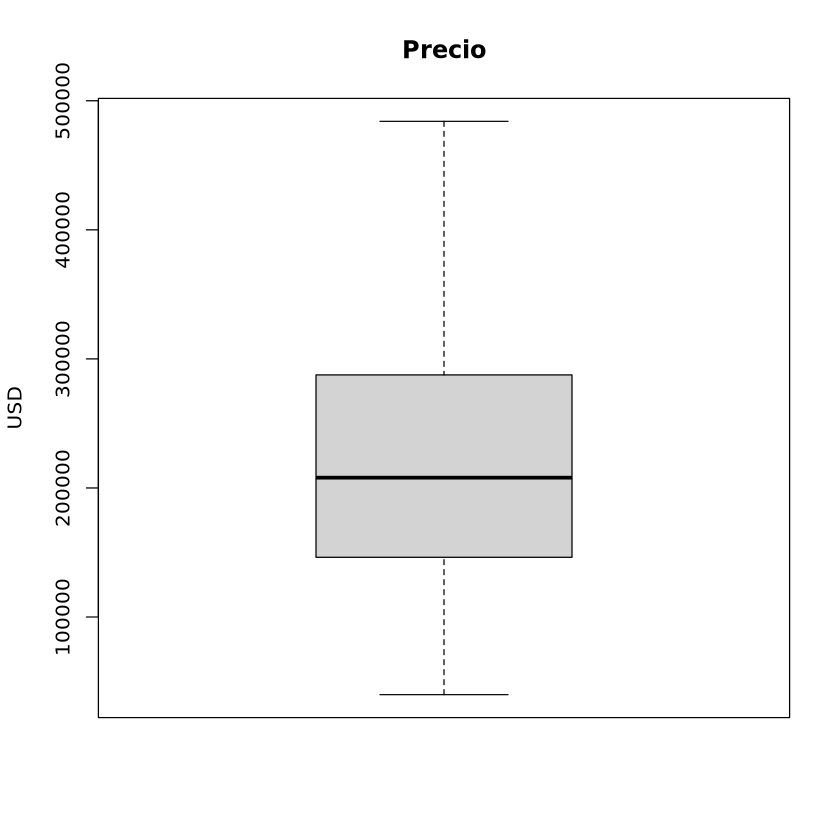

In [163]:
boxplot(train_trans_clean$SalePrice, main = "Precio", ylab = "USD")$out

[1] 2337 2337 2337 2056 2056 1928 1928 2337 1928 2337 2337 2056 2056 2337 2337 2337 2056 2337 2337 2337 2056 2337 2056 2092 2092 2056 2056 2337 2337 1928 2337 2056 2337 1928 2337 2056 1928 2056 2337
[40] 1928 1928 1928 1928 1928 1928 1928 1928 1928 2337 2337 2337 1928 1928 1928 2337 1928 2056 2056 2337 1928 2056 2056 1928 2056 2337 2056 2056 1928 2092 2337 1928 1928 1928 2056 1928 1928 2056 2056
[79] 1928 2337 1928 2056 1928 1928 2092 1928 1928 1928

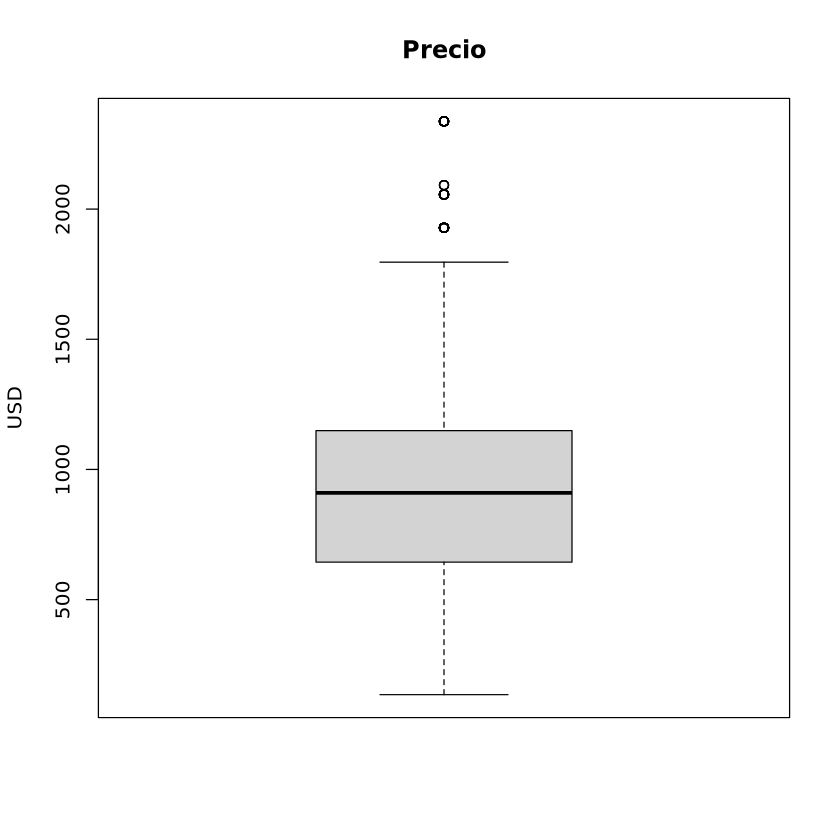

In [178]:
boxplot(train_trans$Size.sqf., main = "Precio", ylab = "USD")$out

In [185]:
p1 <- quantile(train_trans$Size.sqf., 0.05)
p99 <- quantile(train_trans$Size.sqf., 0.95)

train_trans_clean <- subset(train_trans, Size.sqf. >= p1 & Size.sqf. <= p99)

numeric(0)

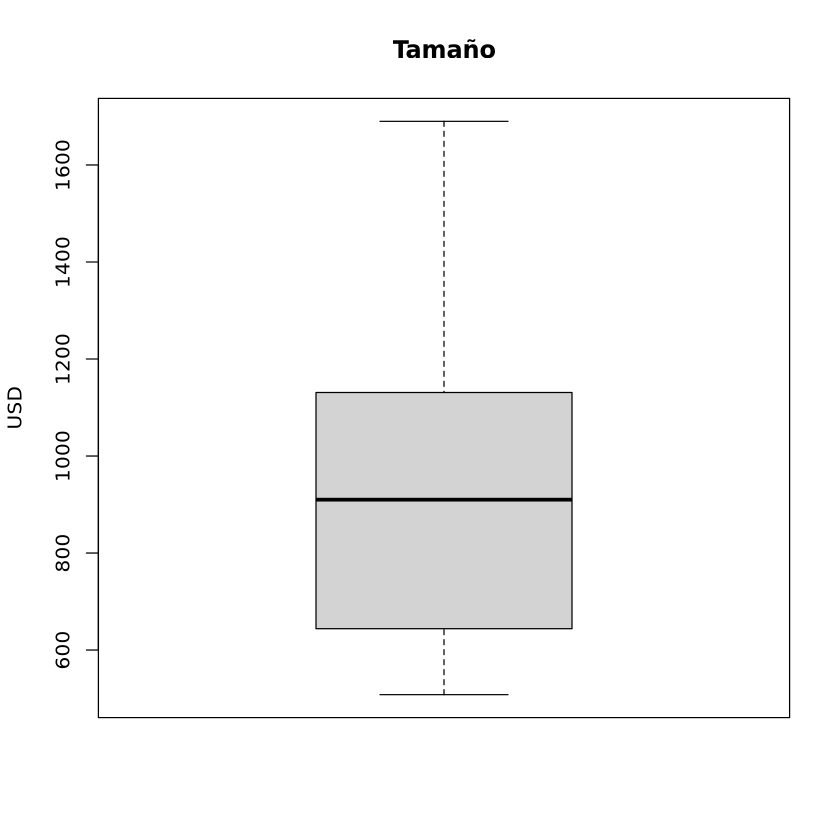

In [186]:
boxplot(train_trans_clean$Size.sqf., main = "Tamaño", ylab = "USD")$out

# Determinación de la estructura del modelo (20 puntos)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

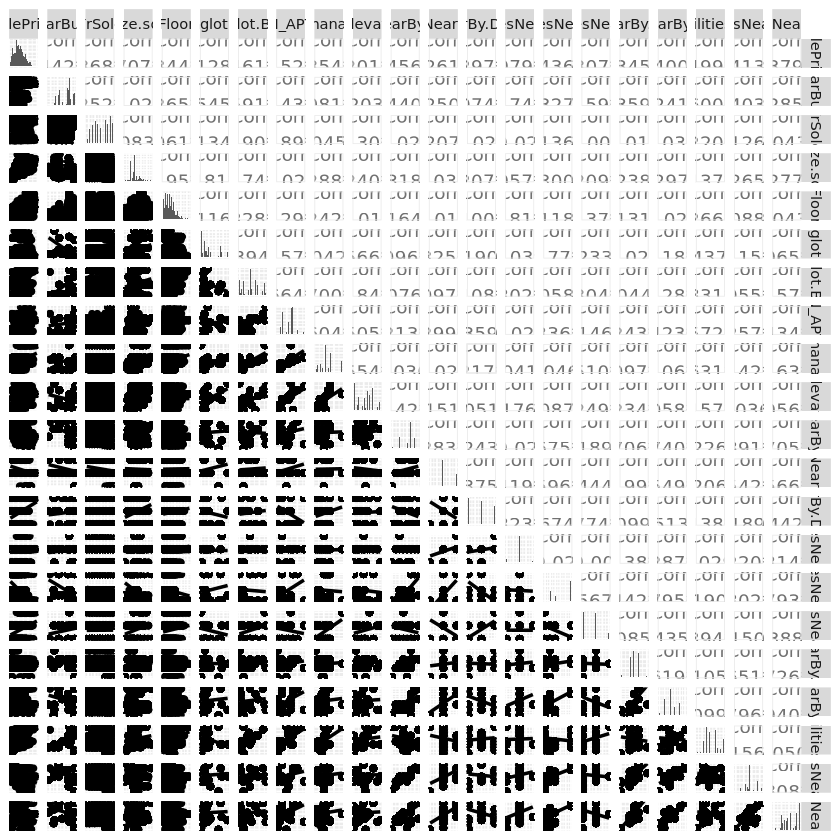

In [86]:
ggpairs(train_num, lower = list(continuous = "smooth"),
        diag = list(continuous = "barDiag"), axisLabels = "none")

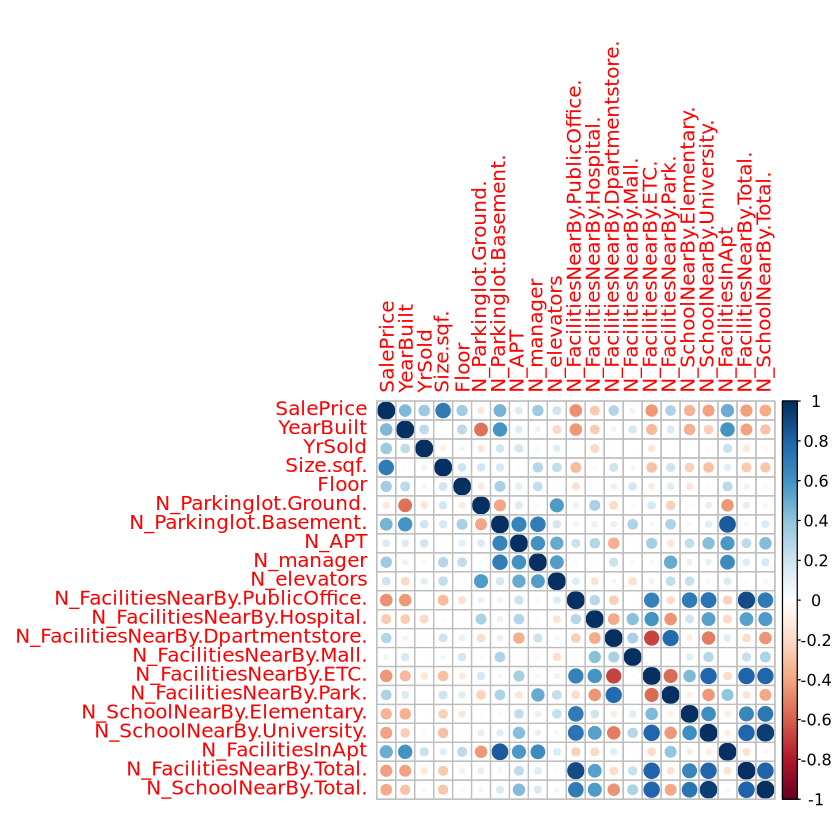

In [88]:
cor_data <- cor(train_num)
corrplot(cor_data)

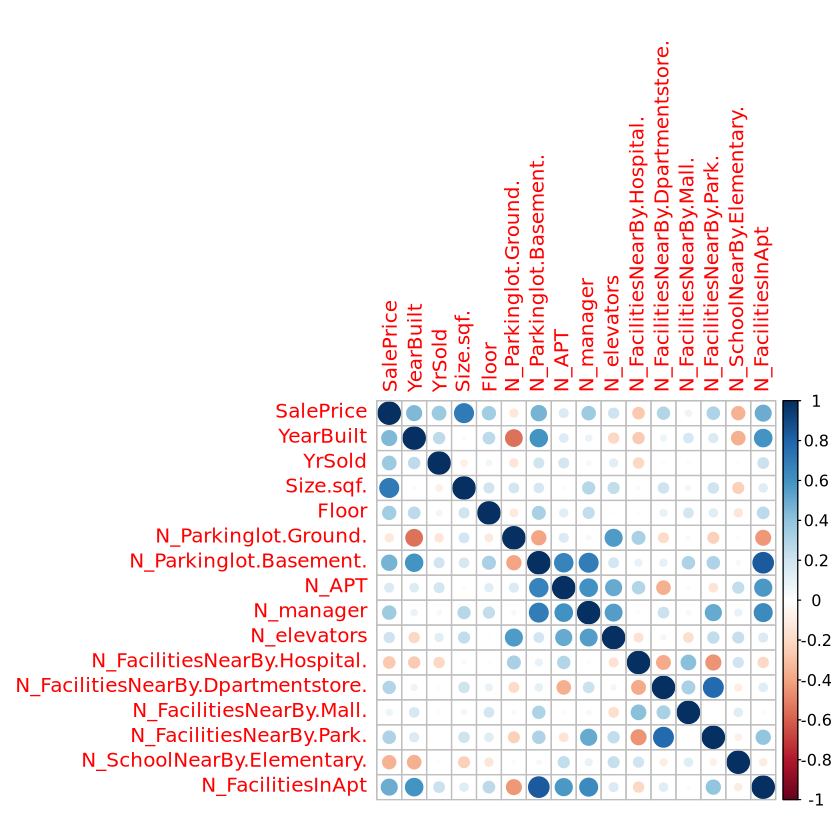

In [129]:
cor_data <- cor(train_red)
corrplot(cor_data)

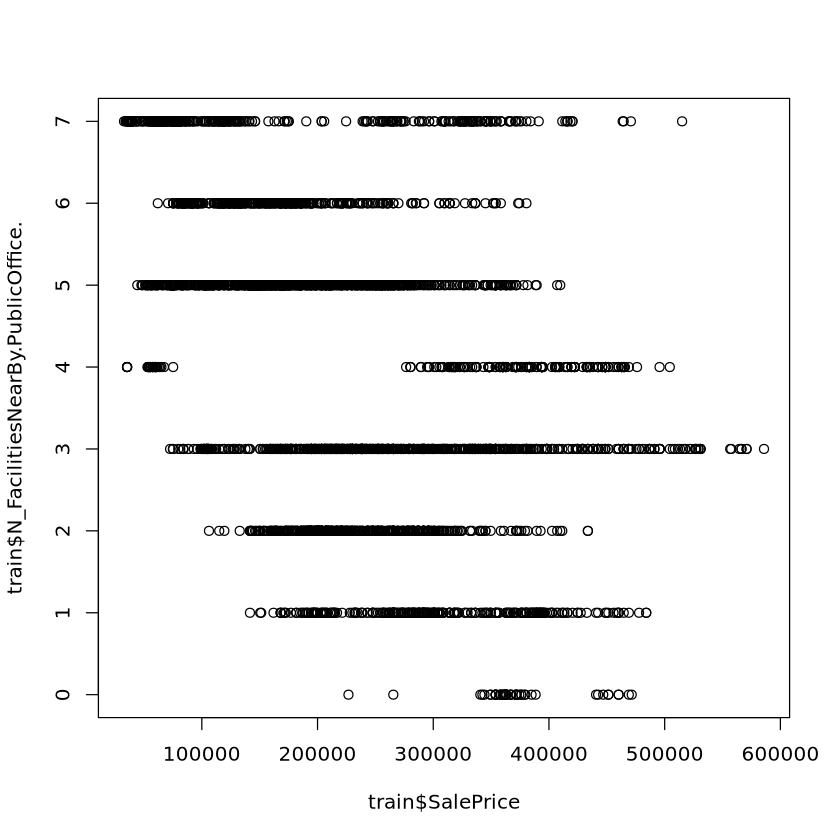

In [89]:
plot(train$SalePrice, train$N_FacilitiesNearBy.PublicOffice.)

# Estimación de los parámetros del modelo (5 puntos)

In [ ]:
train_num_sin <- train_num %>% dplyr::select(-N_Parkinglot.Ground., -N_Parkinglot.Basement., -N_APT, -N_manager, -N_elevators, N_FacilitiesNearBy.Mall.,N_SchoolNearBy.University.)

In [247]:
modelo_num_sin <- lm(log(SalePrice) ~ YearBuilt + YrSold + log(Size.sqf.) + Floor + # nolint: line_length_linter.
                    N_FacilitiesNearBy.PublicOffice. + N_FacilitiesNearBy.Hospital. +  N_FacilitiesNearBy.Dpartmentstore. + N_FacilitiesNearBy.ETC. 
                    + N_FacilitiesNearBy.Park. + N_SchoolNearBy.Elementary. + N_FacilitiesInApt # nolint: line_length_linter.
                , data = train_num) # nolint
summary(modelo_num_sin)


Call:
lm(formula = log(SalePrice) ~ YearBuilt + YrSold + log(Size.sqf.) + 
    Floor + N_FacilitiesNearBy.PublicOffice. + N_FacilitiesNearBy.Hospital. + 
    N_FacilitiesNearBy.Dpartmentstore. + N_FacilitiesNearBy.ETC. + 
    N_FacilitiesNearBy.Park. + N_SchoolNearBy.Elementary. + N_FacilitiesInApt, 
    data = train_num)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.01634 -0.11621  0.01896  0.13419  0.48678 

Coefficients:
                                       Estimate   Std. Error t value             Pr(>|t|)    
(Intercept)                        -157.3128083    2.3114281 -68.059 < 0.0000000000000002 ***
YearBuilt                             0.0136527    0.0004833  28.246 < 0.0000000000000002 ***
YrSold                                0.0674183    0.0010778  62.554 < 0.0000000000000002 ***
log(Size.sqf.)                        0.9522061    0.0080336 118.528 < 0.0000000000000002 ***
Floor                                 0.0037390    0.0004016   9.311 < 0.0000000000000

In [251]:
modelo_num <- lm(SalePrice ~ YearBuilt + YrSold + Size.sqf. + Floor + N_Parkinglot.Ground. + N_Parkinglot.Basement. + N_APT + N_manager + N_elevators + # nolint: line_length_linter.
                    N_FacilitiesNearBy.PublicOffice. + N_FacilitiesNearBy.Hospital. +  N_FacilitiesNearBy.Dpartmentstore. + N_FacilitiesNearBy.Mall. + # nolint
                    N_FacilitiesNearBy.ETC. + N_FacilitiesNearBy.Park. +N_SchoolNearBy.Elementary. + N_SchoolNearBy.University. + N_FacilitiesInApt + # nolint: line_length_linter.
                    + N_SchoolNearBy.Total.
                , data = train_num) # nolint
summary(modelo_num)


Call:
lm(formula = SalePrice ~ YearBuilt + YrSold + Size.sqf. + Floor + 
    N_Parkinglot.Ground. + N_Parkinglot.Basement. + N_APT + N_manager + 
    N_elevators + N_FacilitiesNearBy.PublicOffice. + N_FacilitiesNearBy.Hospital. + 
    N_FacilitiesNearBy.Dpartmentstore. + N_FacilitiesNearBy.Mall. + 
    N_FacilitiesNearBy.ETC. + N_FacilitiesNearBy.Park. + N_SchoolNearBy.Elementary. + 
    N_SchoolNearBy.University. + N_FacilitiesInApt + +N_SchoolNearBy.Total., 
    data = train_num)

Residuals:
    Min      1Q  Median      3Q     Max 
-197985  -24149    2504   23740  145822 

Coefficients:
                                        Estimate    Std. Error t value             Pr(>|t|)    
(Intercept)                        -25417306.807    552788.958 -45.980 < 0.0000000000000002 ***
YearBuilt                               1049.300       159.076   6.596   0.0000000000475454 ***
YrSold                                 11610.142       238.769  48.625 < 0.0000000000000002 ***
Size.sqf.          

In [308]:
modelo_num_log <- lm(log(SalePrice) ~ YearBuilt + YrSold + log(Size.sqf.) + Floor + log(N_Parkinglot.Ground.+1) + sqrt(N_manager) + sqrt(N_elevators) + # nolint: line_length_linter.
                    N_FacilitiesNearBy.PublicOffice. + sqrt(N_FacilitiesNearBy.Hospital.) +  log(N_FacilitiesNearBy.Dpartmentstore.+1) + log(N_FacilitiesNearBy.Mall.+1) + # nolint
                    N_FacilitiesNearBy.ETC. + N_FacilitiesNearBy.Park. +N_SchoolNearBy.Elementary. + N_FacilitiesInApt # nolint: line_length_linter.
                , data = train_num) # nolint
summary(modelo_num_log)


Call:
lm(formula = log(SalePrice) ~ YearBuilt + YrSold + log(Size.sqf.) + 
    Floor + log(N_Parkinglot.Ground. + 1) + sqrt(N_manager) + 
    sqrt(N_elevators) + N_FacilitiesNearBy.PublicOffice. + sqrt(N_FacilitiesNearBy.Hospital.) + 
    log(N_FacilitiesNearBy.Dpartmentstore. + 1) + log(N_FacilitiesNearBy.Mall. + 
    1) + N_FacilitiesNearBy.ETC. + N_FacilitiesNearBy.Park. + 
    N_SchoolNearBy.Elementary. + N_FacilitiesInApt, data = train_num)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.94205 -0.11295  0.02109  0.12935  0.45978 

Coefficients:
                                                Estimate   Std. Error t value             Pr(>|t|)    
(Intercept)                                 -157.5010588    2.2768649 -69.175 < 0.0000000000000002 ***
YearBuilt                                      0.0162228    0.0005554  29.208 < 0.0000000000000002 ***
YrSold                                         0.0650295    0.0010439  62.298 < 0.0000000000000002 ***
log(Size.sqf.)    

### Modelo Log

In [225]:
# modelo log
modelo_log <- lm(log(SalePrice) ~ YearBuilt + YrSold + log(Size.sqf.) + Floor + N_Parkinglot.Ground. + N_Parkinglot.Basement. + N_APT + N_manager + N_elevators + # nolint: line_length_linter.
                    + N_FacilitiesNearBy.Hospital. +  N_FacilitiesNearBy.Dpartmentstore. + N_FacilitiesNearBy.Mall. + # nolint
                    + N_FacilitiesNearBy.Park. + N_SchoolNearBy.Elementary. + log(N_FacilitiesInApt) # nolint: line_length_linter.
                    
                , data = train_num) # nolint
summary(modelo_log)


Call:
lm(formula = log(SalePrice) ~ YearBuilt + YrSold + log(Size.sqf.) + 
    Floor + N_Parkinglot.Ground. + N_Parkinglot.Basement. + N_APT + 
    N_manager + N_elevators + +N_FacilitiesNearBy.Hospital. + 
    N_FacilitiesNearBy.Dpartmentstore. + N_FacilitiesNearBy.Mall. + 
    +N_FacilitiesNearBy.Park. + N_SchoolNearBy.Elementary. + 
    log(N_FacilitiesInApt), data = train_num)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.94654 -0.10998  0.02948  0.12591  0.45378 

Coefficients:
                                        Estimate    Std. Error t value             Pr(>|t|)    
(Intercept)                        -161.56631628    2.43309386 -66.404 < 0.0000000000000002 ***
YearBuilt                             0.01757601    0.00069919  25.138 < 0.0000000000000002 ***
YrSold                                0.06575001    0.00104111  63.154 < 0.0000000000000002 ***
log(Size.sqf.)                        0.88979653    0.00923434  96.357 < 0.0000000000000002 ***
Floor           

#### Modelo reducido

In [221]:
# modelo reducido
modelo_red <- lm(SalePrice ~ YearBuilt + YrSold + Size.sqf. + Floor + N_Parkinglot.Ground. + N_Parkinglot.Basement. + N_APT + N_manager + N_elevators + # nolint: line_length_linter.
                    + N_FacilitiesNearBy.Hospital. +  N_FacilitiesNearBy.Dpartmentstore. + N_FacilitiesNearBy.Mall. + # nolint
                    + N_FacilitiesNearBy.Park. + N_SchoolNearBy.Elementary. + N_FacilitiesInApt # nolint: line_length_linter.
                    
                , data = train_num) # nolint
summary(modelo_red)


Call:
lm(formula = SalePrice ~ YearBuilt + YrSold + Size.sqf. + Floor + 
    N_Parkinglot.Ground. + N_Parkinglot.Basement. + N_APT + N_manager + 
    N_elevators + +N_FacilitiesNearBy.Hospital. + N_FacilitiesNearBy.Dpartmentstore. + 
    N_FacilitiesNearBy.Mall. + +N_FacilitiesNearBy.Park. + N_SchoolNearBy.Elementary. + 
    N_FacilitiesInApt, data = train_num)

Residuals:
    Min      1Q  Median      3Q     Max 
-197030  -23059    3440   26057  157043 

Coefficients:
                                        Estimate    Std. Error t value             Pr(>|t|)    
(Intercept)                        -25024561.713    564663.391 -44.318 < 0.0000000000000002 ***
YearBuilt                               1112.378       162.016   6.866     0.00000000000760 ***
YrSold                                 11340.705       244.179  46.444 < 0.0000000000000002 ***
Size.sqf.                                169.138         2.096  80.687 < 0.0000000000000002 ***
Floor                                   1199.7

#### Modelo transformado

In [ ]:
# modelo reducido
modelo_trans <- lm(SalePrice ~ YearBuilt + YrSold + Size.sqf. + Floor + N_Parkinglot.Ground. + N_Parkinglot.Basement. + N_APT + N_manager + N_elevators + 
                    +  N_FacilitiesNearBy.Dpartmentstore. + N_FacilitiesNearBy.Mall. + 
                    + N_FacilitiesNearBy.Park. + N_SchoolNearBy.Elementary. + N_FacilitiesInApt + N_FacilitiesNearBy.Hospital. 
                    
                , data = train_trans) # nolint
summary(modelo_trans)


Call:
lm(formula = SalePrice ~ YearBuilt + YrSold + Size.sqf. + Floor + 
    N_Parkinglot.Ground. + N_Parkinglot.Basement. + N_APT + N_manager + 
    N_elevators + +N_FacilitiesNearBy.Dpartmentstore. + N_FacilitiesNearBy.Mall. + 
    +N_FacilitiesNearBy.Park. + N_SchoolNearBy.Elementary. + 
    N_FacilitiesInApt + N_FacilitiesNearBy.Hospital., data = train_trans)

Residuals:
    Min      1Q  Median      3Q     Max 
-192649  -22264    3317   26001  149745 

Coefficients:
                                         Estimate    Std. Error t value             Pr(>|t|)    
(Intercept)                         -25971467.845    587274.276 -44.224 < 0.0000000000000002 ***
YearBuilt                                 994.674       179.856   5.530  0.00000003394099686 ***
YrSold                                  11880.484       245.690  48.356 < 0.0000000000000002 ***
Size.sqf.                                 163.599         2.201  74.344 < 0.0000000000000002 ***
Floor                                  

In [173]:
str(train_trans)

tibble [4,124 × 16] (S3: tbl_df/tbl/data.frame)
 $ SalePrice                         : num [1:4124] 141592 51327 48672 221238 78318 ...
 $ YearBuilt                         : num [1:4124] 2006 1985 1985 1993 1992 ...
 $ YrSold                            : num [1:4124] 2007 2007 2007 2007 2007 ...
 $ Size.sqf.                         : num [1:4124] 814 587 587 1761 644 ...
 $ Floor                             : num [1:4124] 3 8 6 3 2 10 13 4 11 18 ...
 $ N_Parkinglot.Ground.              : num [1:4124] 111 80 80 523 142 523 142 713 713 0 ...
 $ N_Parkinglot.Basement.            : num [1:4124] 184 76 76 536 79 536 79 0 0 1270 ...
 $ N_APT                             : num [1:4124] 3 1 1 8 3 8 3 7 7 7 ...
 $ N_manager                         : num [1:4124] 3 2 2 8 4 8 4 8 8 14 ...
 $ N_elevators                       : num [1:4124] 0 2 2 20 8 20 8 27 27 16 ...
 $ N_FacilitiesNearBy.Hospital.      : Factor w/ 3 levels "0","1","2": 2 2 2 3 2 3 2 2 2 2 ...
 $ N_FacilitiesNearBy.Dpartmentstor

In [ ]:

# modelo reducido
modelo_trans_clean <- lm(SalePrice ~ YearBuilt + YrSold + Size.sqf. + Floor + N_Parkinglot.Ground. + N_Parkinglot.Basement. + N_APT + N_manager + N_elevators + # nolint: line_length_linter.
                    +  N_FacilitiesNearBy.Dpartmentstore. + N_FacilitiesNearBy.Mall. + # nolint
                    + N_FacilitiesNearBy.Park. + N_SchoolNearBy.Elementary. + N_FacilitiesInApt + N_FacilitiesNearBy.Hospital. # nolint: line_length_linter.
                    
                , data = train_trans_clean) # nolint
summary(modelo_trans_clean)


Call:
lm(formula = SalePrice ~ YearBuilt + YrSold + Size.sqf. + Floor + 
    N_Parkinglot.Ground. + N_Parkinglot.Basement. + N_APT + N_manager + 
    N_elevators + +N_FacilitiesNearBy.Dpartmentstore. + N_FacilitiesNearBy.Mall. + 
    +N_FacilitiesNearBy.Park. + N_SchoolNearBy.Elementary. + 
    N_FacilitiesInApt + N_FacilitiesNearBy.Hospital., data = train_trans_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-151179  -20416    2696   22407  148913 

Coefficients:
                                         Estimate    Std. Error t value             Pr(>|t|)    
(Intercept)                         -31499922.172    619453.012 -50.851 < 0.0000000000000002 ***
YearBuilt                                2780.657       202.575  13.727 < 0.0000000000000002 ***
YrSold                                  12883.222       228.932  56.275 < 0.0000000000000002 ***
Size.sqf.                                 193.785         2.812  68.902 < 0.0000000000000002 ***
Floor                            

In [210]:
# modelo log
modelo_trans_clean <- lm(log(SalePrice) ~ YearBuilt + YrSold + log(Size.sqf.) + log(Floor) + N_Parkinglot.Ground. + N_Parkinglot.Basement. + N_APT + log(N_manager) + N_elevators + # nolint: line_length_linter.
                    +  N_FacilitiesNearBy.Dpartmentstore. + N_FacilitiesNearBy.Mall. + # nolint
                    + N_FacilitiesNearBy.Park. + N_SchoolNearBy.Elementary. + N_FacilitiesInApt + N_FacilitiesNearBy.Hospital. # nolint: line_length_linter.
                    
                , data = train_trans_clean) # nolint
summary(modelo_trans_clean)


Call:
lm(formula = log(SalePrice) ~ YearBuilt + YrSold + log(Size.sqf.) + 
    log(Floor) + N_Parkinglot.Ground. + N_Parkinglot.Basement. + 
    N_APT + log(N_manager) + N_elevators + +N_FacilitiesNearBy.Dpartmentstore. + 
    N_FacilitiesNearBy.Mall. + +N_FacilitiesNearBy.Park. + N_SchoolNearBy.Elementary. + 
    N_FacilitiesInApt + N_FacilitiesNearBy.Hospital., data = train_trans_clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.95731 -0.09596  0.01874  0.11471  0.48042 

Coefficients:
                                         Estimate    Std. Error t value             Pr(>|t|)    
(Intercept)                         -167.97813817    2.85924732 -58.749 < 0.0000000000000002 ***
YearBuilt                              0.01785338    0.00095480  18.699 < 0.0000000000000002 ***
YrSold                                 0.06830566    0.00105405  64.803 < 0.0000000000000002 ***
log(Size.sqf.)                         0.95144010    0.01264483  75.243 < 0.0000000000000002 ***
log

In [196]:
train_trans_clean <- train_trans_clean %>%
  mutate(
    log_SalePrice = log(SalePrice),
    log_Size = log(Size.sqf.),
    log_Floor = log(Floor),
    log_ParkingGround = log(N_Parkinglot.Ground. + 1),
    log_ParkingBasement = log(N_Parkinglot.Basement. + 1),
    log_APT = log(N_APT),
    log_Manager = log(N_manager),
    log_Elevators = log(N_elevators + 1),
    log_FacilitiesInApt = log(N_FacilitiesInApt)
  )

In [197]:
# modelo log
modelo_trans_clean <- lm(log(SalePrice) ~ YearBuilt + YrSold + log_Size + log_Floor + log_ParkingGround + log_ParkingBasement + log_APT + log_Manager + log_Elevators + # nolint: line_length_linter.
                    +  N_FacilitiesNearBy.Dpartmentstore. + N_FacilitiesNearBy.Mall. + # nolint
                    + N_FacilitiesNearBy.Park. + N_SchoolNearBy.Elementary. + log_FacilitiesInApt + N_FacilitiesNearBy.Hospital. # nolint: line_length_linter.
                    
                , data = train_trans_clean) # nolint
summary(modelo_trans_clean)


Call:
lm(formula = log(SalePrice) ~ YearBuilt + YrSold + log_Size + 
    log_Floor + log_ParkingGround + log_ParkingBasement + log_APT + 
    log_Manager + log_Elevators + +N_FacilitiesNearBy.Dpartmentstore. + 
    N_FacilitiesNearBy.Mall. + +N_FacilitiesNearBy.Park. + N_SchoolNearBy.Elementary. + 
    log_FacilitiesInApt + N_FacilitiesNearBy.Hospital., data = train_trans_clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.80384 -0.10733  0.01849  0.12211  0.49169 

Coefficients:
                                       Estimate  Std. Error t value             Pr(>|t|)    
(Intercept)                         -175.401029    3.088997 -56.783 < 0.0000000000000002 ***
YearBuilt                              0.022743    0.001143  19.903 < 0.0000000000000002 ***
YrSold                                 0.067056    0.001074  62.424 < 0.0000000000000002 ***
log_Size                               1.002510    0.012363  81.088 < 0.0000000000000002 ***
log_Floor                        

# Verificación de los supuestos del modelo (25 puntos)

## Media Cero

### Modelo con las variables númericas

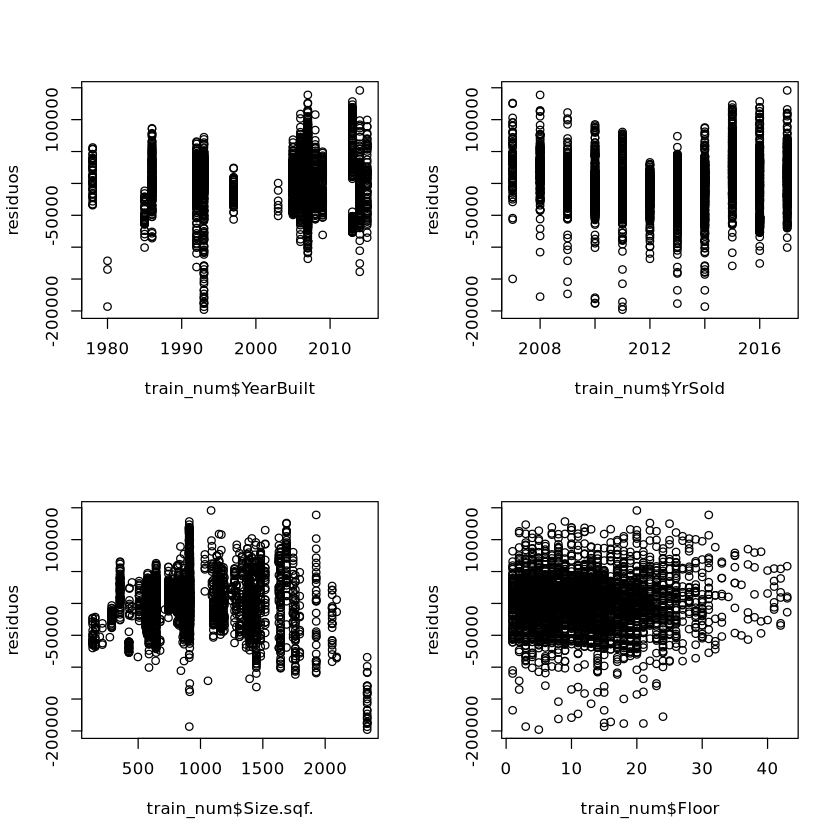

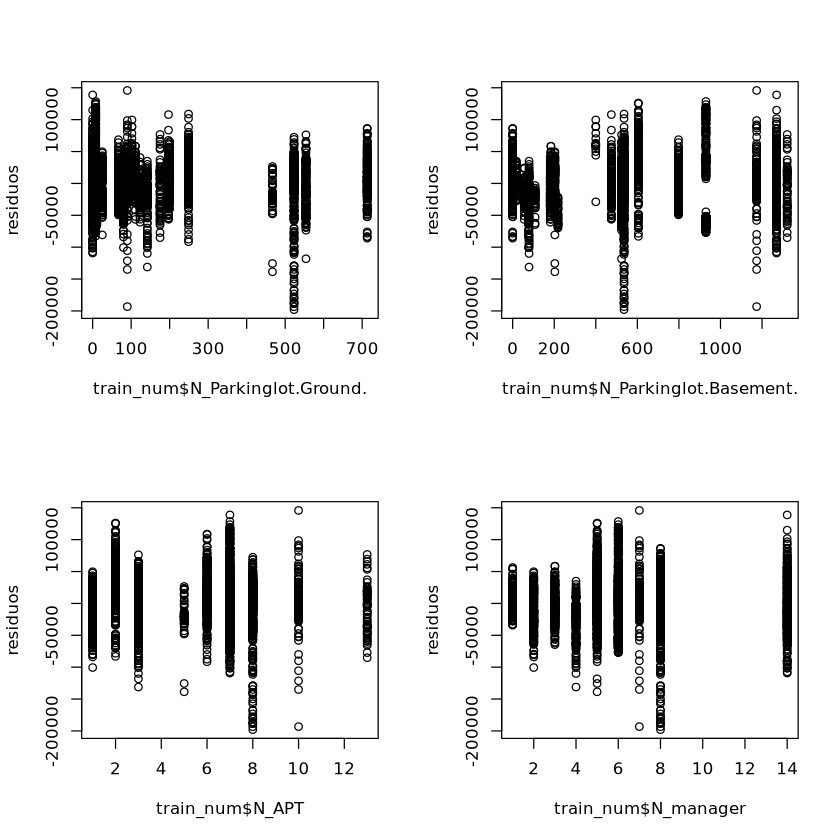

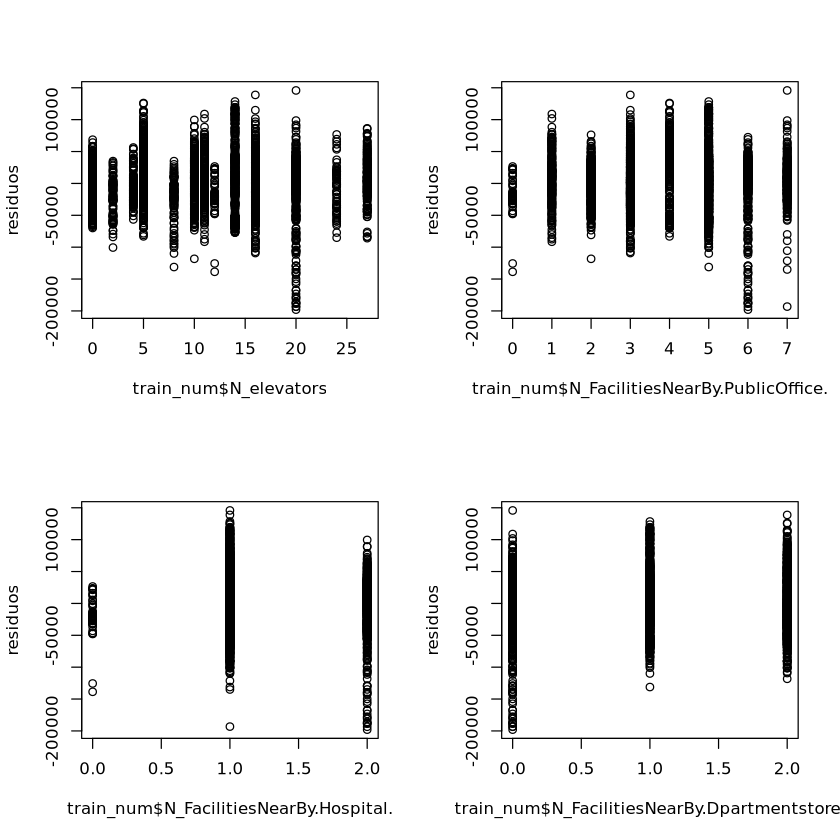

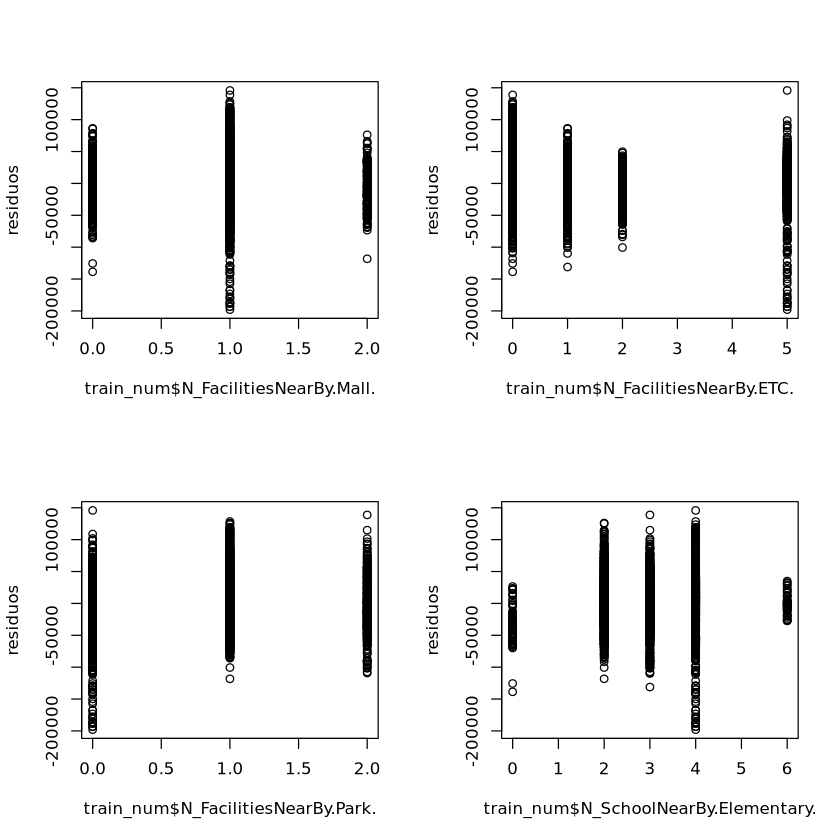

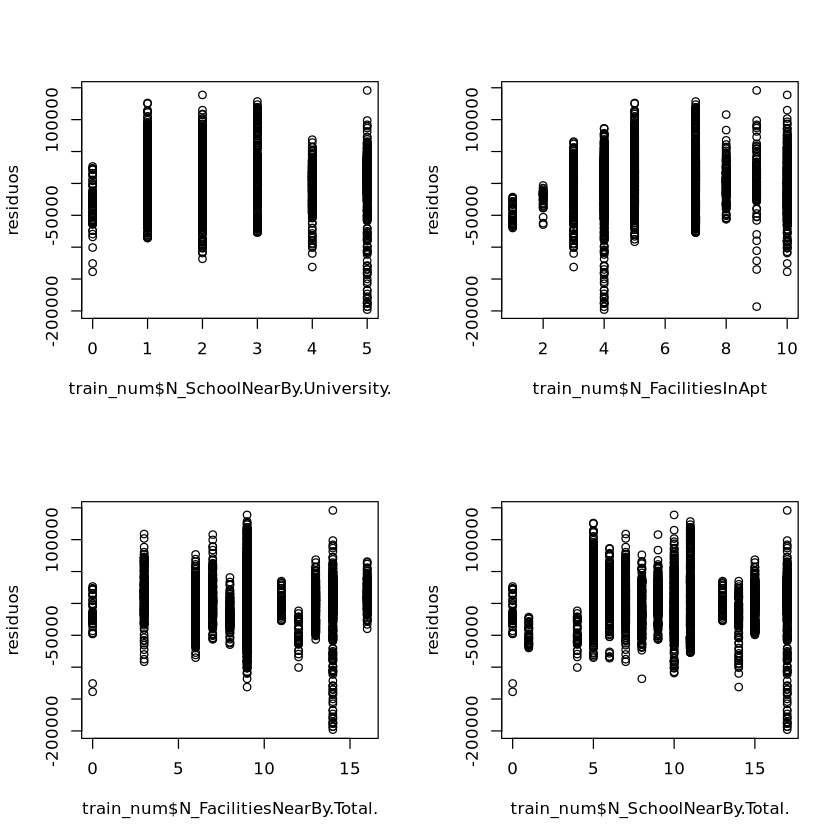

In [45]:
residuos<-modelo_num$residuals

par(mfrow = c(2, 2))
plot(y=residuos,x=train_num$YearBuilt)
plot(y=residuos,x=train_num$YrSold)
plot(y=residuos,x=train_num$Size.sqf.)
plot(y=residuos,x=train_num$Floor)
plot(y=residuos,x=train_num$N_Parkinglot.Ground.)
plot(y=residuos,x=train_num$N_Parkinglot.Basement.)
plot(y=residuos,x=train_num$N_APT)
plot(y=residuos,x=train_num$N_manager)
plot(y=residuos,x=train_num$N_elevators)
plot(y=residuos,x=train_num$N_FacilitiesNearBy.PublicOffice.)
plot(y=residuos,x=train_num$N_FacilitiesNearBy.Hospital.)
plot(y=residuos,x=train_num$N_FacilitiesNearBy.Dpartmentstore.)
plot(y=residuos,x=train_num$N_FacilitiesNearBy.Mall.)
plot(y=residuos,x=train_num$N_FacilitiesNearBy.ETC.)
plot(y=residuos,x=train_num$N_FacilitiesNearBy.Park.)
plot(y=residuos,x=train_num$N_SchoolNearBy.Elementary.) 
plot(y=residuos,x=train_num$N_SchoolNearBy.University.) 
plot(y=residuos,x=train_num$N_FacilitiesInApt) 
plot(y=residuos,x=train_num$N_FacilitiesNearBy.Total.) 
plot(y=residuos,x=train_num$N_SchoolNearBy.Total.)


#### Modelo reducido

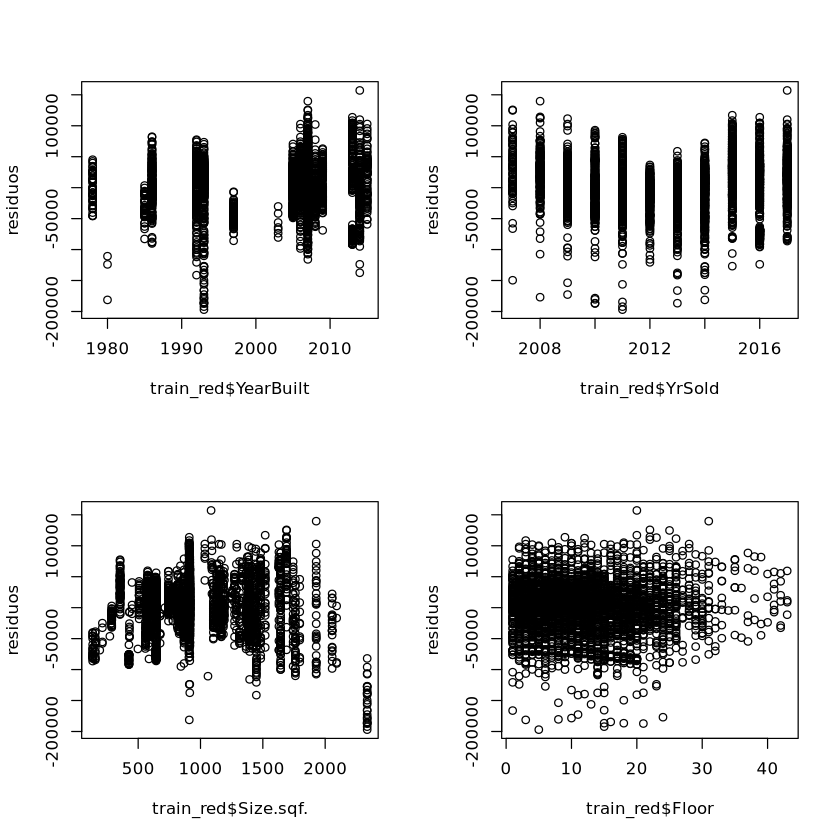

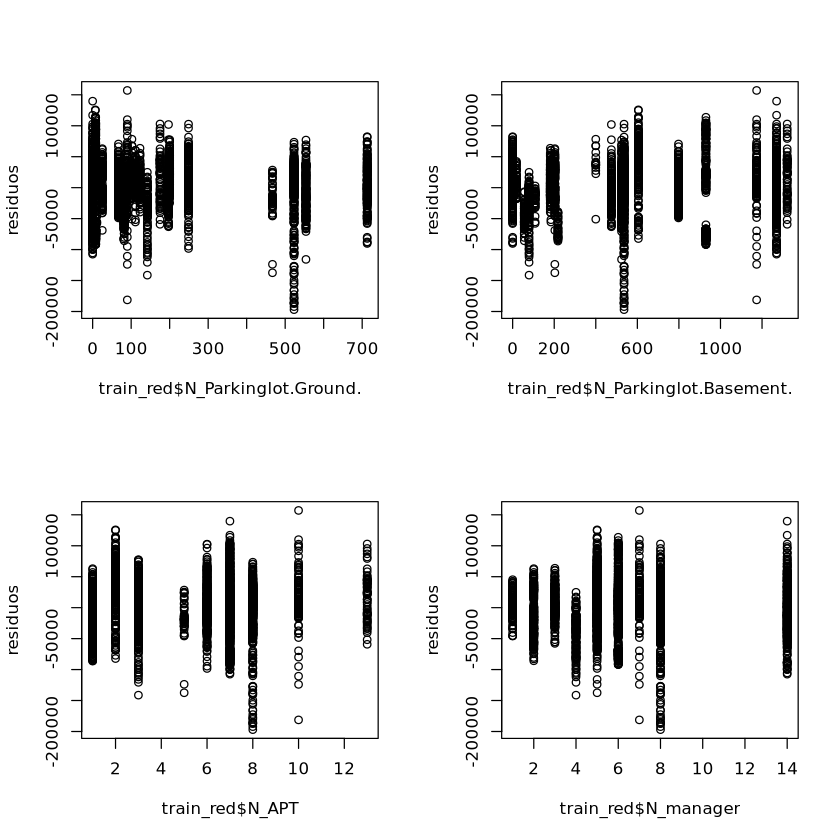

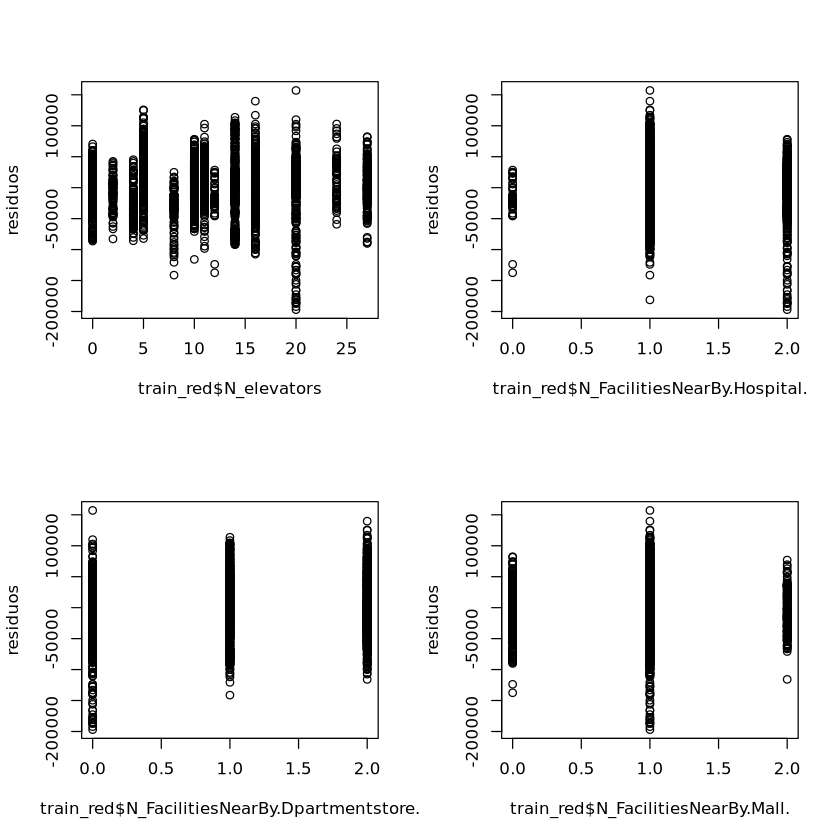

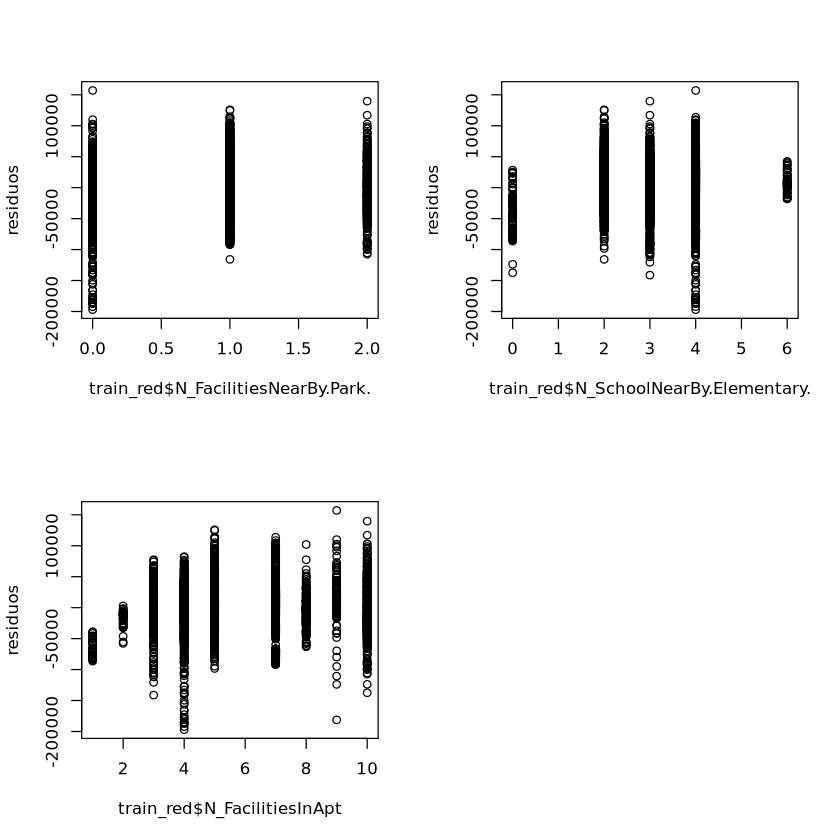

In [122]:
residuos<-modelo_red$residuals

par(mfrow = c(2, 2))
plot(y=residuos,x=train_red$YearBuilt)
plot(y=residuos,x=train_red$YrSold)
plot(y=residuos,x=train_red$Size.sqf.)
plot(y=residuos,x=train_red$Floor)
plot(y=residuos,x=train_red$N_Parkinglot.Ground.)
plot(y=residuos,x=train_red$N_Parkinglot.Basement.)
plot(y=residuos,x=train_red$N_APT)
plot(y=residuos,x=train_red$N_manager)
plot(y=residuos,x=train_red$N_elevators)
plot(y=residuos,x=train_red$N_FacilitiesNearBy.Hospital.)
plot(y=residuos,x=train_red$N_FacilitiesNearBy.Dpartmentstore.)
plot(y=residuos,x=train_red$N_FacilitiesNearBy.Mall.)
plot(y=residuos,x=train_red$N_FacilitiesNearBy.Park.)
plot(y=residuos,x=train_red$N_SchoolNearBy.Elementary.) 
plot(y=residuos,x=train_red$N_FacilitiesInApt) 


#### Modelo log

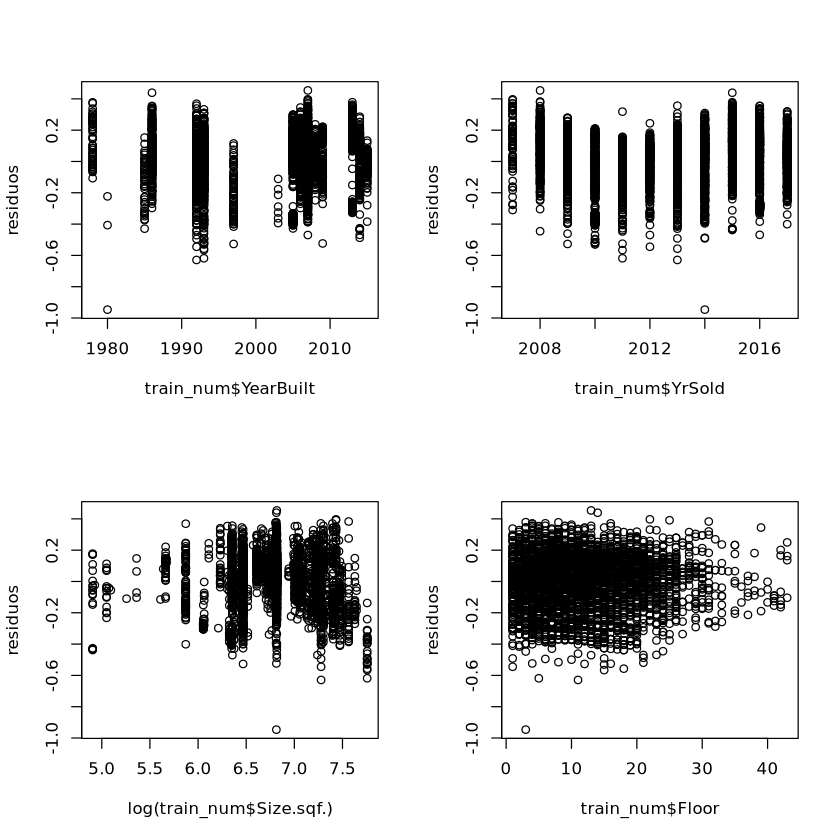

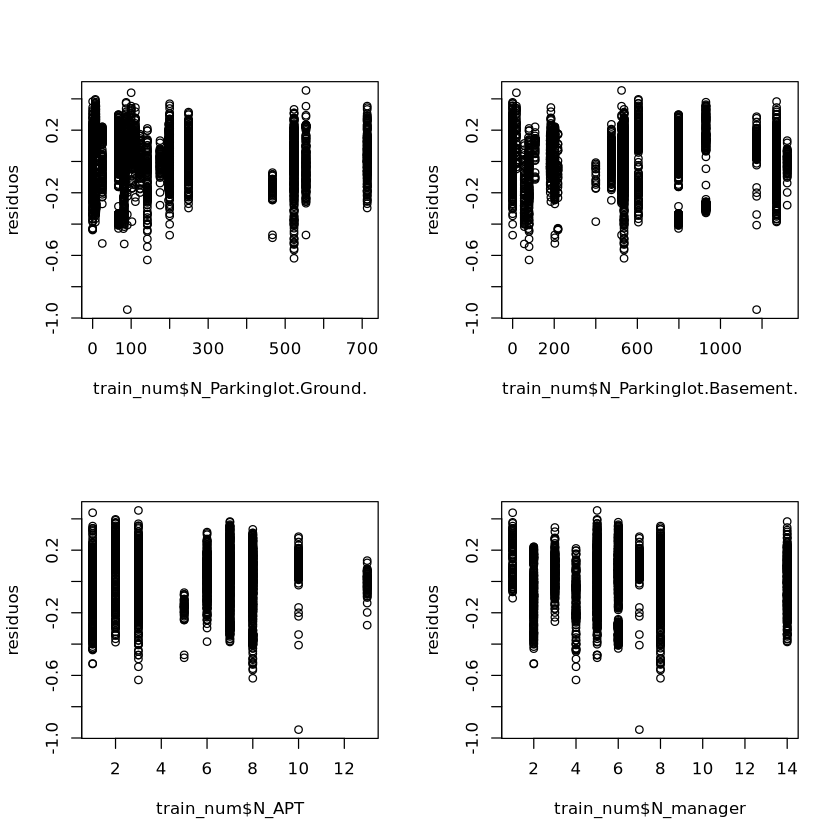

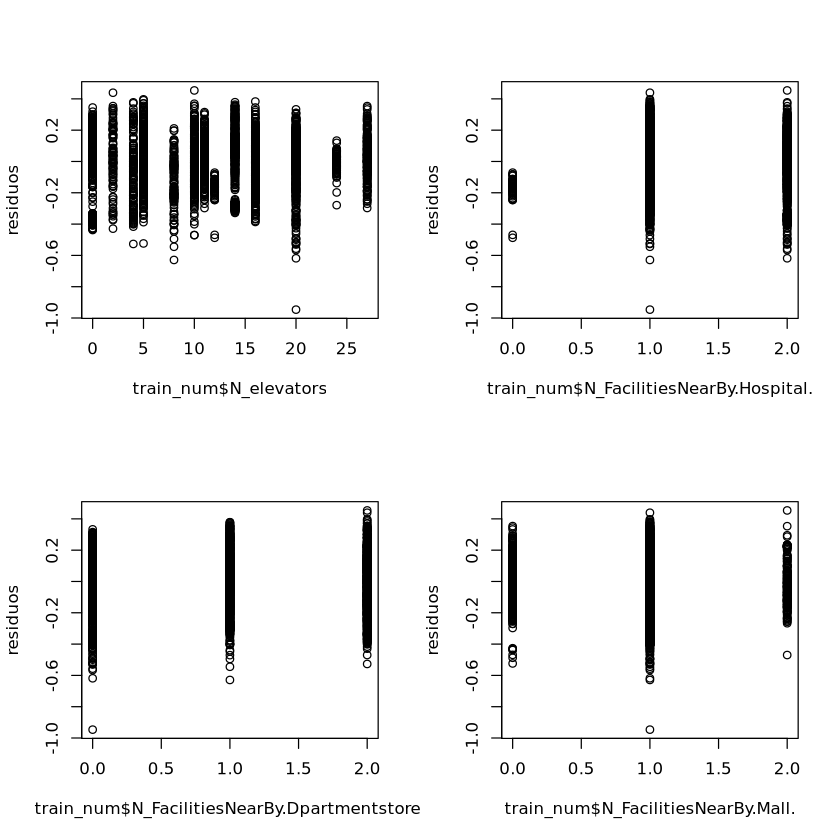

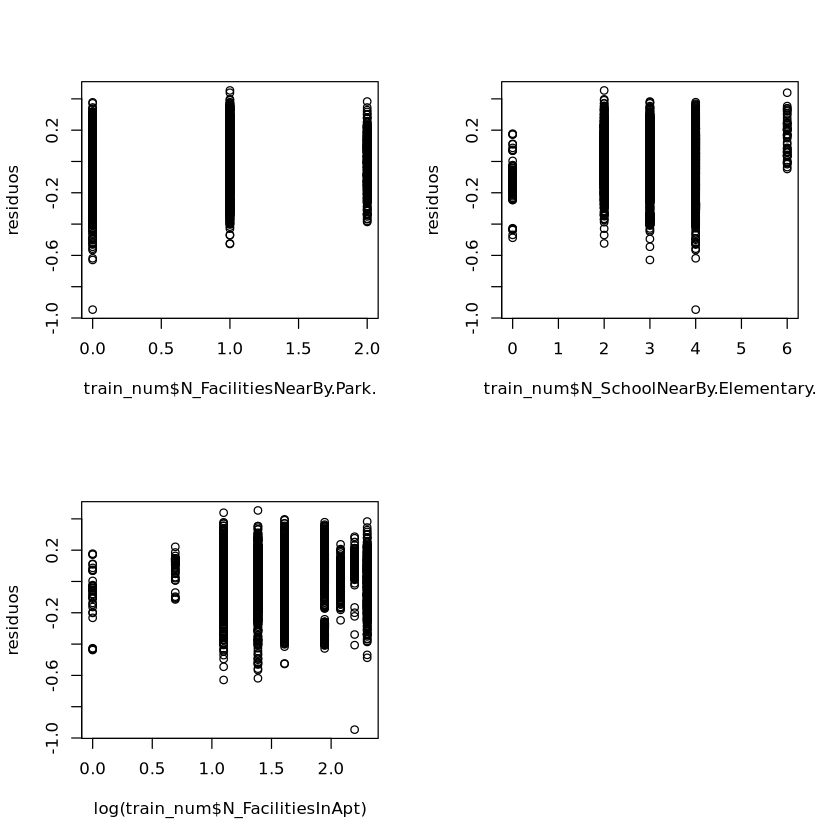

In [226]:
residuos<-modelo_log$residuals

par(mfrow = c(2, 2))
plot(y=residuos,x=train_num$YearBuilt)
plot(y=residuos,x=train_num$YrSold)
plot(y=residuos,x=log(train_num$Size.sqf.))
plot(y=residuos,x=train_num$Floor)
plot(y=residuos,x=train_num$N_Parkinglot.Ground.)
plot(y=residuos,x=train_num$N_Parkinglot.Basement.)
plot(y=residuos,x=train_num$N_APT)
plot(y=residuos,x=train_num$N_manager)
plot(y=residuos,x=train_num$N_elevators)
plot(y=residuos,x=train_num$N_FacilitiesNearBy.Hospital.)
plot(y=residuos,x=train_num$N_FacilitiesNearBy.Dpartmentstore.)
plot(y=residuos,x=train_num$N_FacilitiesNearBy.Mall.)
plot(y=residuos,x=train_num$N_FacilitiesNearBy.Park.)
plot(y=residuos,x=train_num$N_SchoolNearBy.Elementary.) 
plot(y=residuos,x=log(train_num$N_FacilitiesInApt))


#### Modelo 4

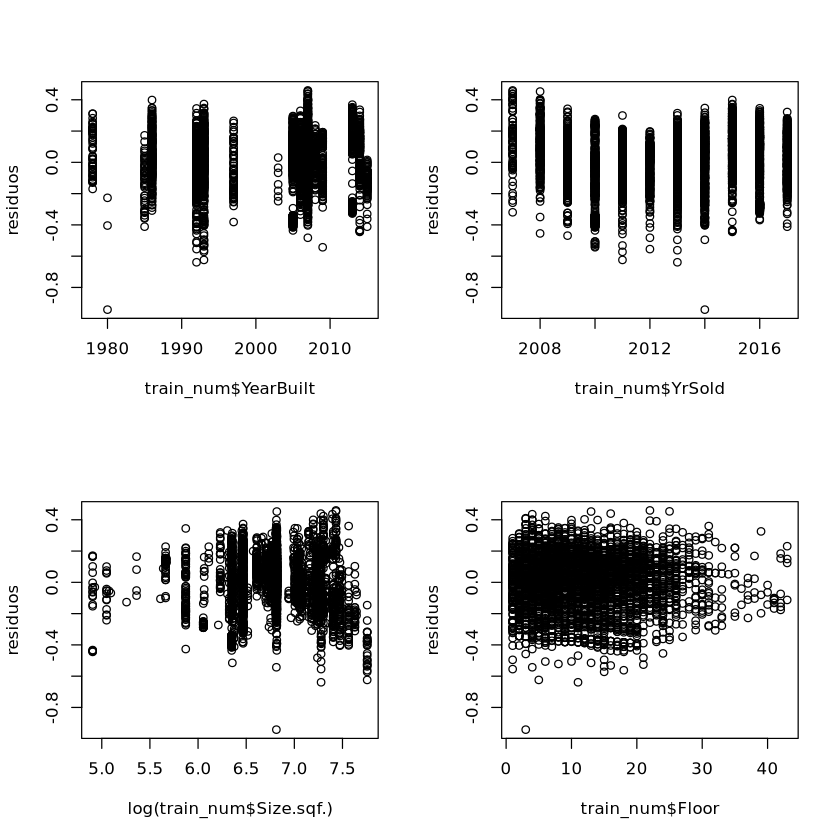

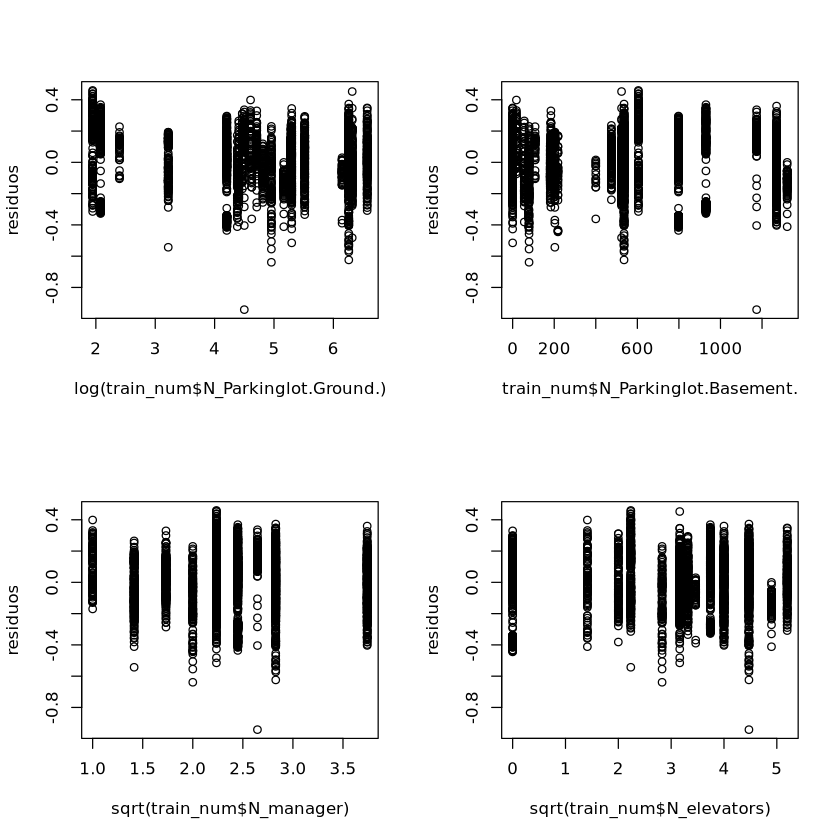

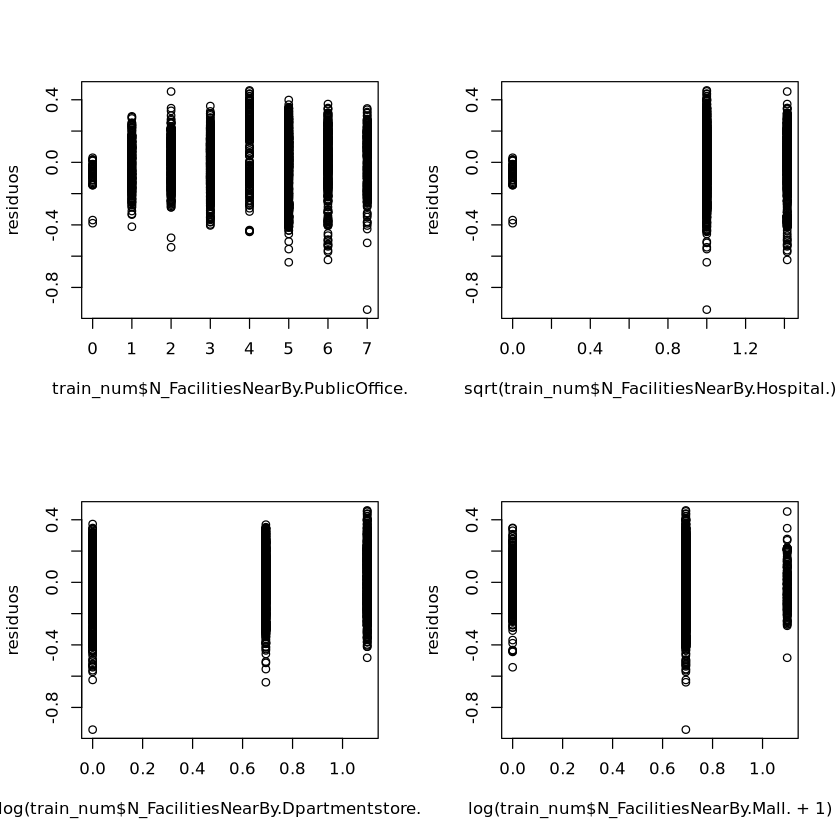

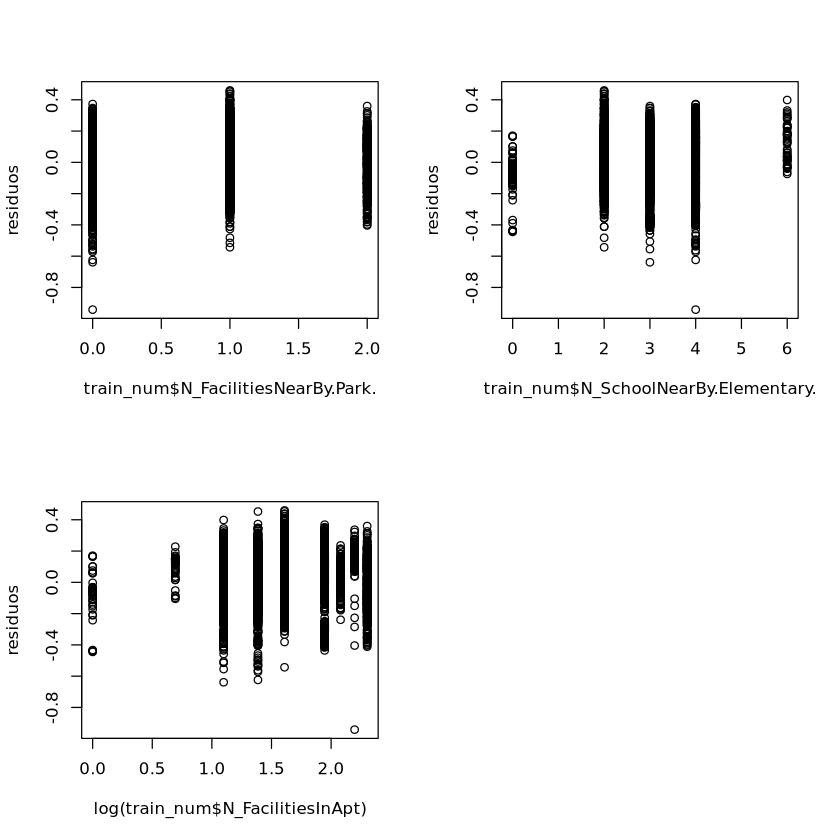

In [310]:

residuos<-modelo_num_log$residuals

par(mfrow = c(2, 2))
plot(y=residuos,x=train_num$YearBuilt)
plot(y=residuos,x=train_num$YrSold)
plot(y=residuos,x=log(train_num$Size.sqf.))
plot(y=residuos,x=train_num$Floor)
plot(y=residuos,x=log(train_num$N_Parkinglot.Ground.))
plot(y=residuos,x=train_num$N_Parkinglot.Basement.)
plot(y=residuos,x=sqrt(train_num$N_manager))
plot(y=residuos,x=sqrt(train_num$N_elevators))
plot(y=residuos,x=train_num$N_FacilitiesNearBy.PublicOffice.)
plot(y=residuos,x=sqrt(train_num$N_FacilitiesNearBy.Hospital.))
plot(y=residuos,x=log(train_num$N_FacilitiesNearBy.Dpartmentstore.+ 1))
plot(y=residuos,x=log(train_num$N_FacilitiesNearBy.Mall.+1))
plot(y=residuos,x=train_num$N_FacilitiesNearBy.Park.)
plot(y=residuos,x=train_num$N_SchoolNearBy.Elementary.) 
plot(y=residuos,x=log(train_num$N_FacilitiesInApt))


### Varianza Constante

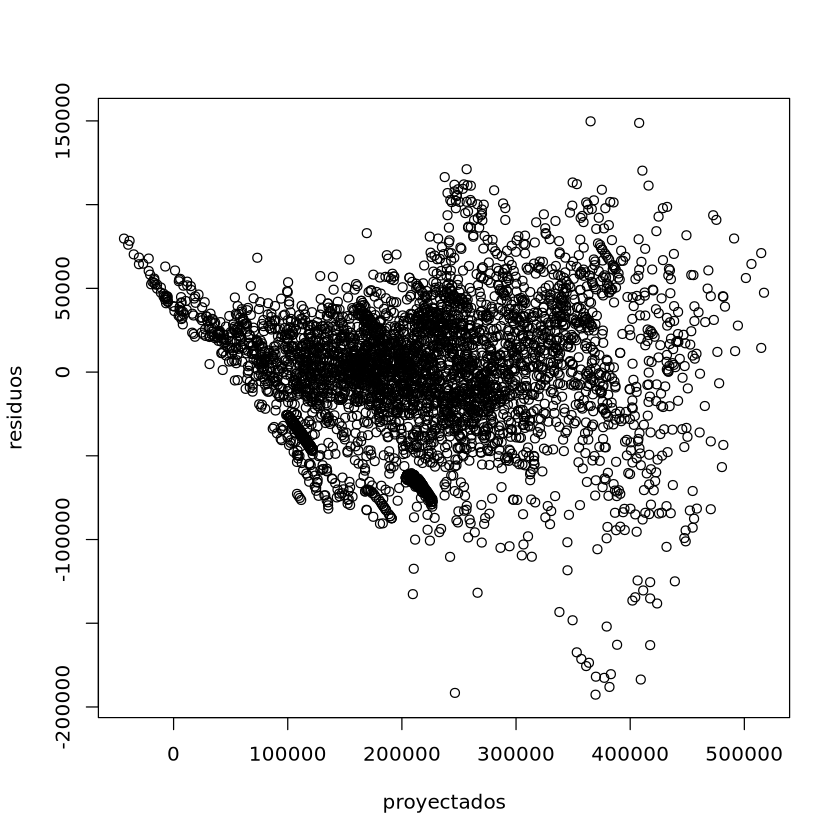

In [174]:
residuos<-modelo_trans$residuals
proyectados<-modelo_trans$fitted.values

plot(y=residuos,x=proyectados)

In [176]:
bptest(modelo_trans)


	studentized Breusch-Pagan test

data:  modelo_trans
BP = 869.12, df = 19, p-value < 0.00000000000000022


#### Modelo reducido

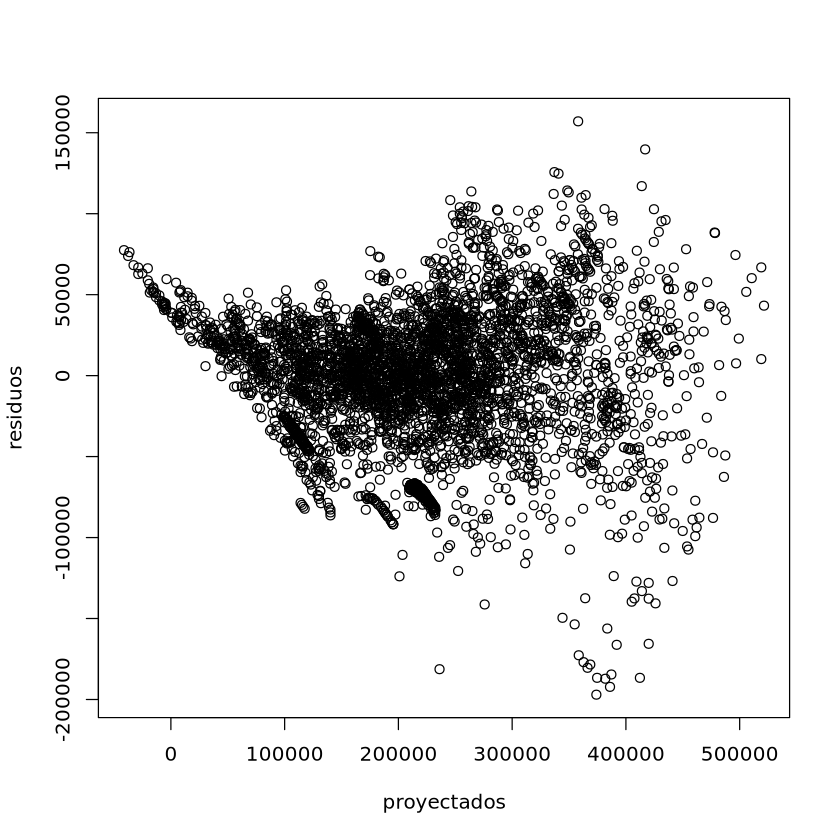

In [123]:
residuos<-modelo_red$residuals
proyectados<-modelo_red$fitted.values

plot(y=residuos,x=proyectados)

In [124]:
bptest(modelo_red)


	studentized Breusch-Pagan test

data:  modelo_red
BP = 768.27, df = 15, p-value < 0.00000000000000022


#### modelo log

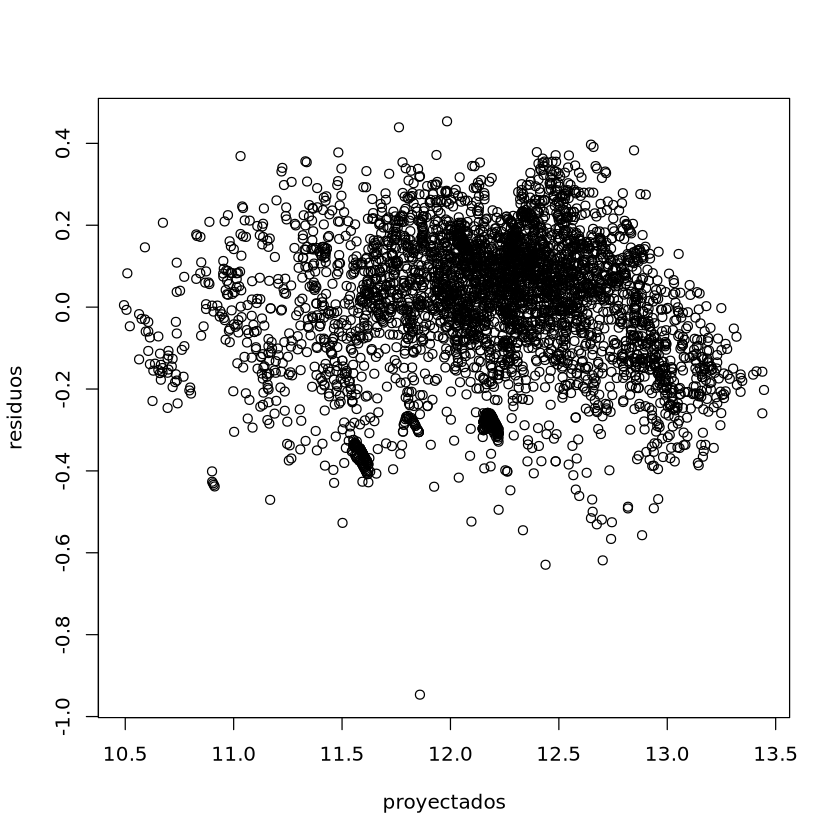

In [227]:
residuos<-modelo_log$residuals
proyectados<-modelo_log$fitted.values

plot(y=residuos,x=proyectados)

In [228]:
bptest(modelo_log)


	studentized Breusch-Pagan test

data:  modelo_log
BP = 252.66, df = 15, p-value < 0.00000000000000022


### Modelo 4

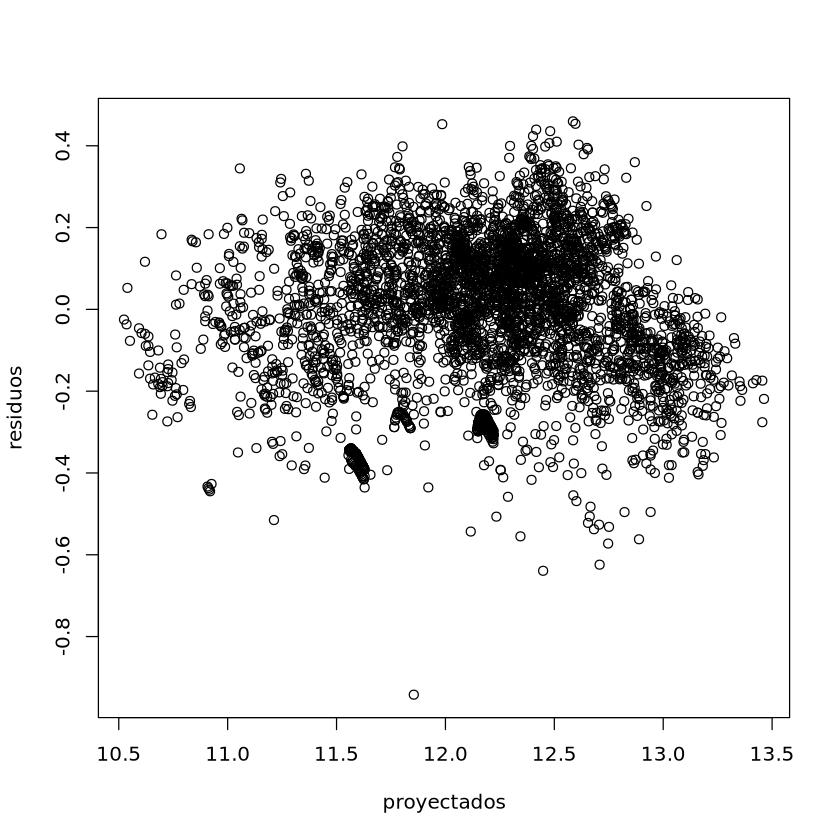

In [311]:
residuos<-modelo_num_log$residuals
proyectados<-modelo_num_log$fitted.values

plot(y=residuos,x=proyectados)

In [313]:
bptest(modelo_num_log)


	studentized Breusch-Pagan test

data:  modelo_num_log
BP = 333.59, df = 15, p-value < 0.00000000000000022


### Normalidad

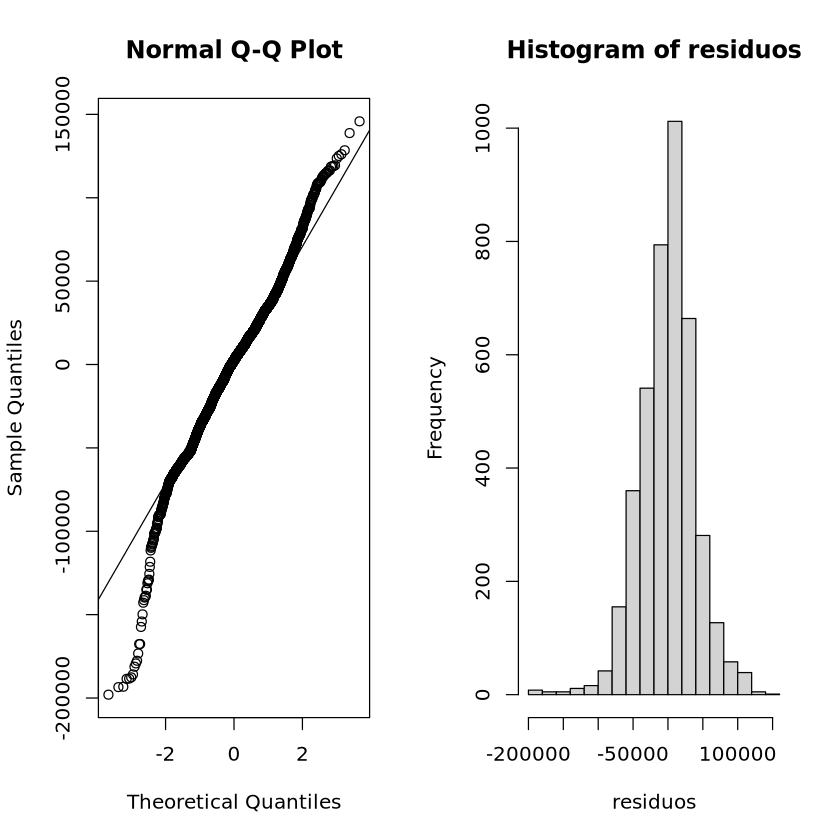

In [48]:
residuos<-modelo_num$residuals

par(mfrow=c(1,2))
qqnorm(residuos)
qqline(residuos)
hist(residuos)

In [128]:
residuos<-modelo_num$residuals
shapiro.test(residuos)


	Shapiro-Wilk normality test

data:  residuos
W = 0.9822, p-value < 0.00000000000000022


#### Modelo reducido

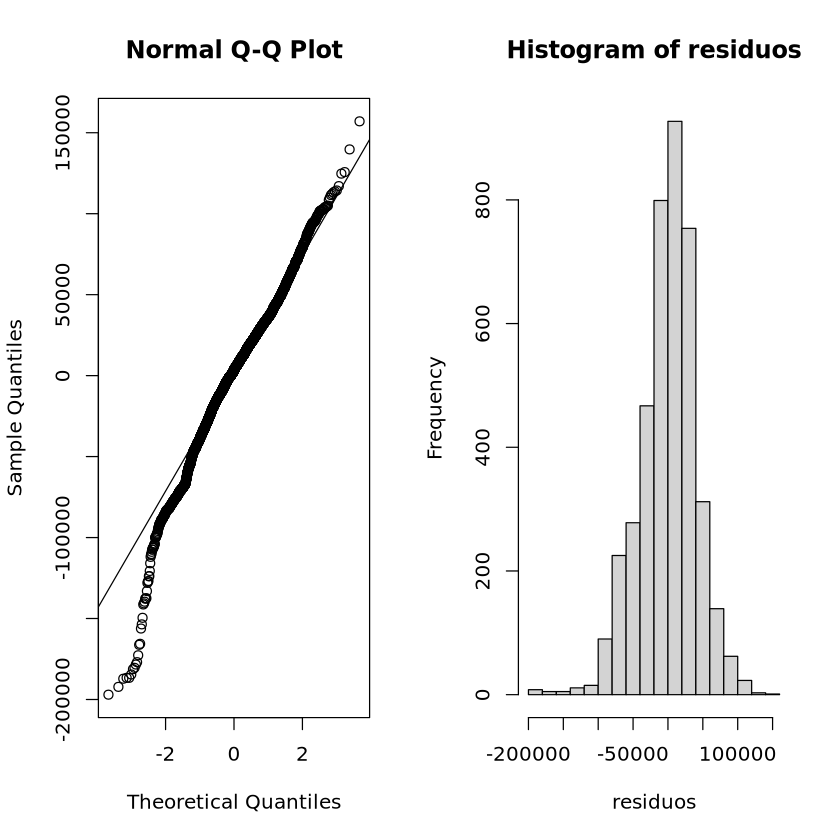

In [125]:
residuos<-modelo_red$residuals

par(mfrow=c(1,2))
qqnorm(residuos)
qqline(residuos)
hist(residuos)

In [127]:
residuos<-modelo_red$residuals
shapiro.test(residuos)


	Shapiro-Wilk normality test

data:  residuos
W = 0.98173, p-value < 0.00000000000000022


#### Modelo log

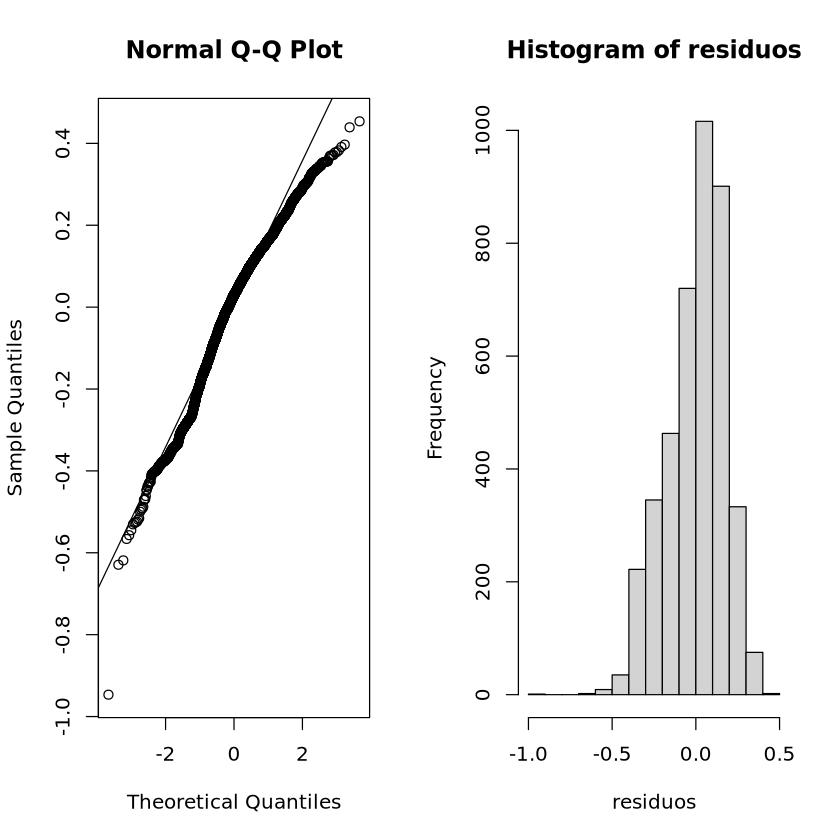

In [229]:
residuos<-modelo_log$residuals

par(mfrow=c(1,2))
qqnorm(residuos)
qqline(residuos)
hist(residuos)

In [230]:
residuos<-modelo_log$residuals
shapiro.test(residuos)


	Shapiro-Wilk normality test

data:  residuos
W = 0.97342, p-value < 0.00000000000000022


#### Modelo 4

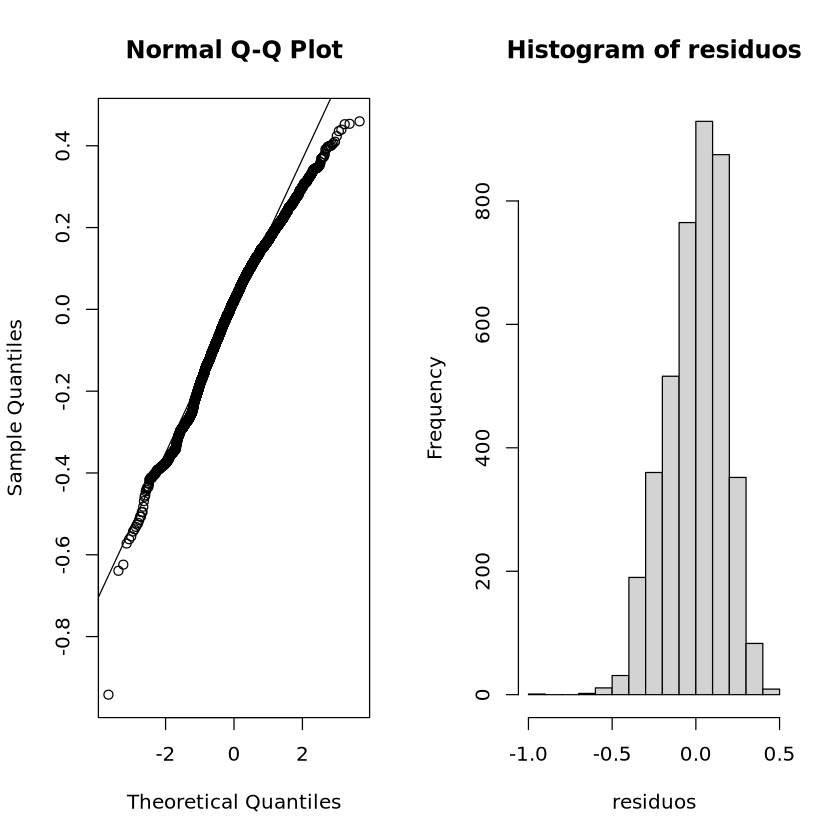

In [314]:
residuos<-modelo_num_log$residuals

par(mfrow=c(1,2))
qqnorm(residuos)
qqline(residuos)
hist(residuos)

In [315]:
residuos<-modelo_num_log$residuals
shapiro.test(residuos)


	Shapiro-Wilk normality test

data:  residuos
W = 0.98258, p-value < 0.00000000000000022


### Independencia

In [50]:
dwtest(modelo_num)


	Durbin-Watson test

data:  modelo_num
DW = 1.1354, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


#### Modelo reducido

In [130]:
dwtest(modelo_red)


	Durbin-Watson test

data:  modelo_red
DW = 1.0877, p-value < 0.00000000000000022
alternative hypothesis: true autocorrelation is greater than 0


#### Modelo log

In [231]:
dwtest(modelo_log)


	Durbin-Watson test

data:  modelo_log
DW = 1.0591, p-value < 0.00000000000000022
alternative hypothesis: true autocorrelation is greater than 0


#### MOdelo 4

In [316]:
dwtest(modelo_num)


	Durbin-Watson test

data:  modelo_num
DW = 1.1354, p-value < 0.00000000000000022
alternative hypothesis: true autocorrelation is greater than 0


# Determinación de la bondad de ajuste del modelo (5 puntos)

In [51]:
summary(modelo_num)


Call:
lm(formula = SalePrice ~ YearBuilt + YrSold + Size.sqf. + Floor + 
    N_Parkinglot.Ground. + N_Parkinglot.Basement. + N_APT + N_manager + 
    N_elevators + N_FacilitiesNearBy.PublicOffice. + N_FacilitiesNearBy.Hospital. + 
    N_FacilitiesNearBy.Dpartmentstore. + N_FacilitiesNearBy.Mall. + 
    N_FacilitiesNearBy.ETC. + N_FacilitiesNearBy.Park. + N_SchoolNearBy.Elementary. + 
    N_SchoolNearBy.University. + N_FacilitiesInApt + +N_SchoolNearBy.Total., 
    data = train_num)

Residuals:
    Min      1Q  Median      3Q     Max 
-197985  -24149    2504   23740  145822 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        -2.542e+07  5.528e+05 -45.980  < 2e-16 ***
YearBuilt                           1.049e+03  1.591e+02   6.596 4.75e-11 ***
YrSold                              1.161e+04  2.388e+02  48.625  < 2e-16 ***
Size.sqf.                           1.700e+02  2.084e+00  81.534  < 2e-16 ***
Floor        

In [52]:
AIC(modelo_num)

[1] 99091.05

In [53]:
BIC(modelo_num)

[1] 99223.86

In [55]:
summary(modelo_num)$adj.r.squared

[1] 0.8597522

#### Modelo reducido

In [131]:
AIC(modelo_red)
BIC(modelo_red)
summary(modelo_red)$adj.r.squared

[1] 99333.5

[1] 99441.02

[1] 0.851116

In [232]:
AIC(modelo_log)
BIC(modelo_log)
summary(modelo_log)$adj.r.squared

[1] -2702.923

[1] -2595.405

[1] 0.9004289

In [317]:
AIC(modelo_num_log)
BIC(modelo_num_log)
summary(modelo_num_log)$adj.r.squared

[1] -2659.772

[1] -2552.255

[1] 0.8993816

# Cálculo de intervalos de confianza para los parámetros del modelo (5 puntos)

In [132]:
confint(modelo_num)

,2.5 %,97.5 %
(Intercept),-26501072.88180,-24333540.73186
YearBuilt,737.42417,1361.17518
YrSold,11142.02631,12078.25786
Size.sqf.,165.86430,174.03743
Floor,1053.41861,1403.47651
N_Parkinglot.Ground.,20.23120,66.67734
N_Parkinglot.Basement.,76.08598,111.29547
N_APT,-11720.11931,-8721.88260
N_manager,-5569.81539,-2857.35743
N_elevators,1495.75354,2508.62040


#### Modelo Reducido

In [133]:
confint(modelo_red)

,2.5 %,97.5 %
(Intercept),-26131607.79790,-23917515.62852
YearBuilt,794.73855,1430.01758
YrSold,10861.98115,11819.42811
Size.sqf.,165.02818,173.24760
Floor,1019.77552,1379.79927
N_Parkinglot.Ground.,14.78987,51.14039
N_Parkinglot.Basement.,53.43126,82.06583
N_APT,-11568.17184,-8584.20379
N_manager,-2432.94568,-407.87575
N_elevators,1064.61787,2013.10341


#### Modelo Log

In [233]:
confint(modelo_log)

,2.5 %,97.5 %
(Intercept),-166.3364980782,-156.796134490303
YearBuilt,0.0162052223,0.018946806127
YrSold,0.0637088624,0.067791152922
log(Size.sqf.),0.8716922143,0.907900836985
Floor,0.0030822776,0.004609188594
N_Parkinglot.Ground.,-0.0001458620,0.000009187376
N_Parkinglot.Basement.,0.0000412748,0.000162533544
N_APT,-0.0454107358,-0.032351347977
N_manager,0.0125328078,0.021100939148
N_elevators,0.0087623734,0.012870174228


#### Modelo 4

In [318]:
confint(modelo_num_log)

,2.5 %,97.5 %
(Intercept),-161.964947232,-153.037170360
YearBuilt,0.015133893,0.017311745
YrSold,0.062983007,0.067076031
log(Size.sqf.),0.906829040,0.938681258
Floor,0.003146041,0.004675436
log(N_Parkinglot.Ground. + 1),-0.034792570,-0.023513631
sqrt(N_manager),-0.006081172,0.030740123
sqrt(N_elevators),0.032062698,0.045872830
N_FacilitiesNearBy.PublicOffice.,-0.044560588,-0.032291899
sqrt(N_FacilitiesNearBy.Hospital.),0.156325302,0.235783905


# Prueba de hipótesis sobre los parámetros del modelo (10 puntos) 

In [ ]:
534.4/421.94

[1] 1.266531

# Interpretación de los coeficientes del modelo (10 puntos) 

# Otros

In [ ]:
#Eliminación hacia adelante
step.model_num <- stepAIC(modelo_num, direction = "backward", 
                      trace = FALSE)

summary(step.model_num)


Call:
lm(formula = SalePrice ~ YearBuilt + YrSold + Size.sqf. + Floor + 
    N_Parkinglot.Ground. + N_Parkinglot.Basement. + N_APT + N_manager + 
    N_elevators + N_FacilitiesNearBy.PublicOffice. + N_FacilitiesNearBy.Hospital. + 
    N_FacilitiesNearBy.Dpartmentstore. + N_FacilitiesNearBy.Mall. + 
    N_FacilitiesNearBy.ETC. + N_FacilitiesNearBy.Park. + N_SchoolNearBy.Elementary. + 
    N_SchoolNearBy.University. + N_FacilitiesInApt + +N_SchoolNearBy.Total., 
    data = train_num)

Residuals:
    Min      1Q  Median      3Q     Max 
-197985  -24149    2504   23740  145822 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        -2.542e+07  5.528e+05 -45.980  < 2e-16 ***
YearBuilt                           1.049e+03  1.591e+02   6.596 4.75e-11 ***
YrSold                              1.161e+04  2.388e+02  48.625  < 2e-16 ***
Size.sqf.                           1.700e+02  2.084e+00  81.534  < 2e-16 ***
Floor        

#### Modelo REducido

In [134]:
#Eliminación hacia adelante
step.model_red <- stepAIC(modelo_red, direction = "backward", 
                      trace = FALSE)

summary(step.model_red)


Call:
lm(formula = SalePrice ~ YearBuilt + YrSold + Size.sqf. + Floor + 
    N_Parkinglot.Ground. + N_Parkinglot.Basement. + N_APT + N_manager + 
    N_elevators + +N_FacilitiesNearBy.Hospital. + N_FacilitiesNearBy.Dpartmentstore. + 
    N_FacilitiesNearBy.Mall. + +N_FacilitiesNearBy.Park. + N_SchoolNearBy.Elementary. + 
    N_FacilitiesInApt, data = train_num)

Residuals:
    Min      1Q  Median      3Q     Max 
-197030  -23059    3440   26057  157043 

Coefficients:
                                        Estimate    Std. Error t value             Pr(>|t|)    
(Intercept)                        -25024561.713    564663.391 -44.318 < 0.0000000000000002 ***
YearBuilt                               1112.378       162.016   6.866     0.00000000000760 ***
YrSold                                 11340.705       244.179  46.444 < 0.0000000000000002 ***
Size.sqf.                                169.138         2.096  80.687 < 0.0000000000000002 ***
Floor                                   1199.7

##### Modelo numeros

In [ ]:
#ELiminación hacia atras
models_num <- regsubsets(SalePrice~., data = train_num, nvmax = 21, method = "forward")
summary(models_num)

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“1  linear dependencies found”


Reordering variables and trying again:


Warning message in rval$lopt[] <- rval$vorder[rval$lopt]:
“number of items to replace is not a multiple of replacement length”


Subset selection object
Call: regsubsets.formula(SalePrice ~ ., data = train_num, nvmax = 21, 
    method = "forward")
20 Variables  (and intercept)
                                   Forced in Forced out
YearBuilt                              FALSE      FALSE
YrSold                                 FALSE      FALSE
Size.sqf.                              FALSE      FALSE
Floor                                  FALSE      FALSE
N_Parkinglot.Ground.                   FALSE      FALSE
N_Parkinglot.Basement.                 FALSE      FALSE
N_APT                                  FALSE      FALSE
N_manager                              FALSE      FALSE
N_elevators                            FALSE      FALSE
N_FacilitiesNearBy.PublicOffice.       FALSE      FALSE
N_FacilitiesNearBy.Hospital.           FALSE      FALSE
N_FacilitiesNearBy.Dpartmentstore.     FALSE      FALSE
N_FacilitiesNearBy.Mall.               FALSE      FALSE
N_FacilitiesNearBy.ETC.                FALSE      FALSE
N_Facilitie

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“1  linear dependencies found”


Reordering variables and trying again:


Warning message in rval$lopt[] <- rval$vorder[rval$lopt]:
“number of items to replace is not a multiple of replacement length”


[1] 16

(Intercept)                          YearBuilt                             YrSold                          Size.sqf.                              Floor 
                     -2.541731e+07                       1.049300e+03                       1.161014e+04                       1.699509e+02                       1.228448e+03 
              N_Parkinglot.Ground.             N_Parkinglot.Basement.                              N_APT                          N_manager                        N_elevators 
                      4.345427e+01                       9.369072e+01                      -1.022100e+04                      -4.213586e+03                       2.002187e+03 
      N_FacilitiesNearBy.Hospital. N_FacilitiesNearBy.Dpartmentstore.           N_FacilitiesNearBy.Mall.            N_FacilitiesNearBy.ETC.           N_FacilitiesNearBy.Park. 
                     -1.503784e+04                       4.379673e+04                      -2.170639e+04                       1.506437e+04                      -3.002826e+04 
        N_SchoolNearBy.Elementary.         N_SchoolNearBy.University.                  N_FacilitiesInApt              N_SchoolNearBy.Total.          N_FacilitiesNearBy.Total. 
                     -1.370292e+04                      -7.432068e+03                       1.142662e+04                       3.403901e+03                      -5.924086e+03

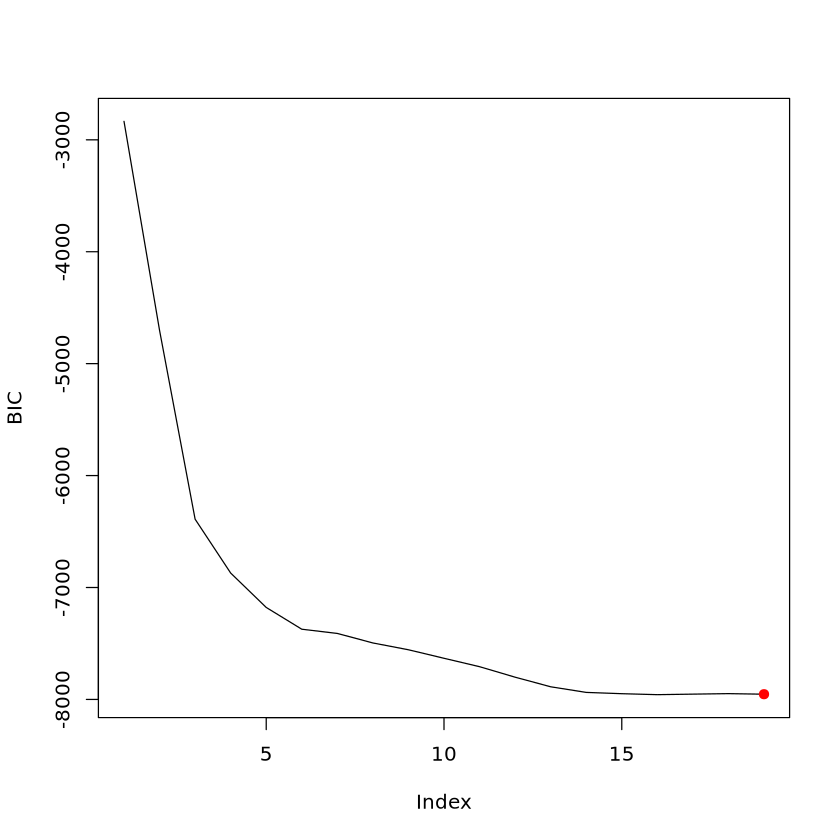

In [80]:
models_num <- regsubsets(SalePrice~., data = train_num, nvmax = 21, method = "forward")
sumreg<-summary(models_num)

## determinar el máximo
which.min(sumreg$bic)
plot(sumreg$bic,type = "l",ylab = "BIC")
points(19,sumreg$bic[19],pch=19,col='red')

# Observar las variables seleccionadas
coef(models_num,19)

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“1  linear dependencies found”


Reordering variables and trying again:


[1] 19

(Intercept)                          YearBuilt                             YrSold                          Size.sqf.                              Floor 
                     -2.554784e+07                       1.048077e+03                       1.167356e+04                       1.700964e+02                       1.221012e+03 
              N_Parkinglot.Ground.             N_Parkinglot.Basement.                              N_APT                          N_manager                        N_elevators 
                      1.569612e+01                       7.444574e+01                      -9.678496e+03                      -2.764060e+03                       2.358056e+03 
  N_FacilitiesNearBy.PublicOffice.       N_FacilitiesNearBy.Hospital. N_FacilitiesNearBy.Dpartmentstore.           N_FacilitiesNearBy.Mall.            N_FacilitiesNearBy.ETC. 
                      0.000000e+00                      -9.437840e+03                       4.227198e+04                      -9.960363e+03                       1.754463e+04 
          N_FacilitiesNearBy.Park.         N_SchoolNearBy.Elementary.         N_SchoolNearBy.University.                  N_FacilitiesInApt          N_FacilitiesNearBy.Total. 
                     -3.044671e+04                      -9.455080e+03                      -3.294914e+03                       1.199697e+04                      -6.584950e+03

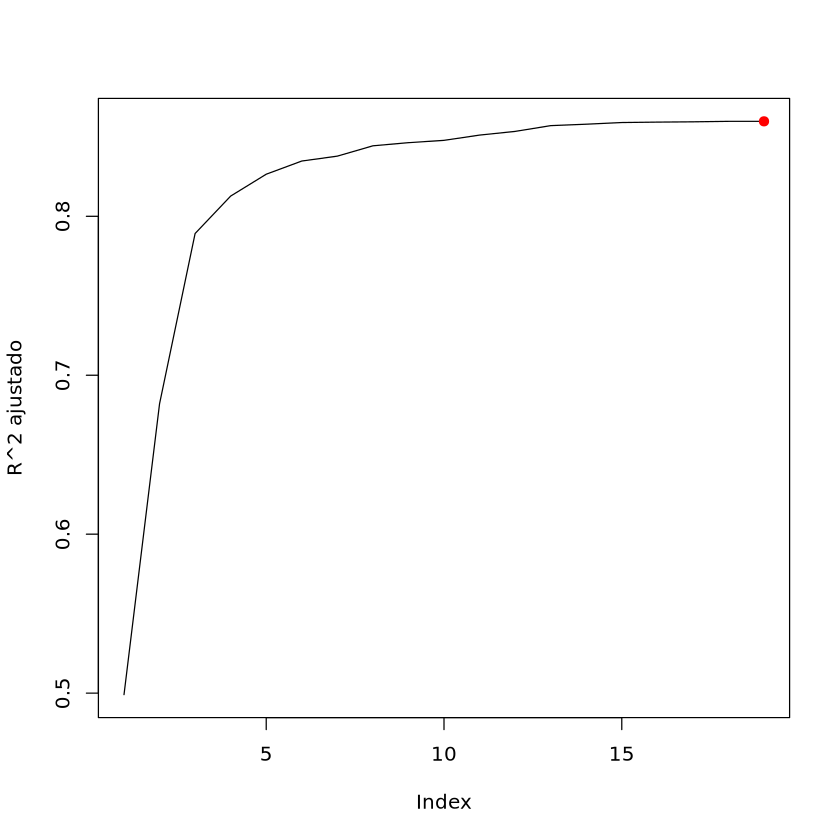

In [82]:
models_num <- regsubsets(SalePrice~., data = train_num, nvmax = 21, method = "exhaustive")
sumreg<-summary(models_num)

## determinar el máximo
which.max(sumreg$adjr2)
plot(sumreg$adjr2,type = "l",ylab = "R^2 ajustado")
points(19,sumreg$adjr2[19],pch=19,col='red')

# Observar las variables seleccionadas
coef(models_num,19)

In [85]:
confint(modelo_num)

,2.5 %,97.5 %
(Intercept),-26501072.88180,-24333540.73186
YearBuilt,737.42417,1361.17518
YrSold,11142.02631,12078.25786
Size.sqf.,165.86430,174.03743
Floor,1053.41861,1403.47651
N_Parkinglot.Ground.,20.23120,66.67734
N_Parkinglot.Basement.,76.08598,111.29547
N_APT,-11720.11931,-8721.88260
N_manager,-5569.81539,-2857.35743
N_elevators,1495.75354,2508.62040


In [319]:
anova(modelo_num_log,modelo_num)

Warning message in anova.lmlist(object, ...):
“models with response ‘"SalePrice"’ removed because response differs from model 1”


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
YearBuilt,1,252.46926526,252.46926526,8254.1667285,0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
YrSold,1,86.09365548,86.09365548,2814.7243424,0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
log(Size.sqf.),1,754.10083089,754.10083089,24654.3831065,0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Floor,1,3.98132205,3.98132205,130.1643430,0.000000000000000000000000000010517051132599753283290624813625765369734671095963818600478440393
log(N_Parkinglot.Ground. + 1),1,1.34367382,1.34367382,43.9297343,0.000000000038449752474911724758347855655432937470317167338862418546341359615325927734375000000
sqrt(N_manager),1,1.66293969,1.66293969,54.3677324,0.000000000000200026725240273233188283067373136317392435384876492321382102090865373611450195312
sqrt(N_elevators),1,0.02337533,0.02337533,0.7642272,0.382059957647584935713780396326910704374313354492187500000000000000000000000000000000000000000
N_FacilitiesNearBy.PublicOffice.,1,12.66198676,12.66198676,413.9678138,0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000927968
sqrt(N_FacilitiesNearBy.Hospital.),1,0.05686802,0.05686802,1.8592287,0.172788556270281223881113419338362291455268859863281250000000000000000000000000000000000000000


In [238]:
vif(modelo_log)

YearBuilt                             YrSold                     log(Size.sqf.)                              Floor               N_Parkinglot.Ground. 
                          5.211018                           1.244640                           2.009623                           1.198243                          10.135184 
            N_Parkinglot.Basement.                              N_APT                          N_manager                        N_elevators       N_FacilitiesNearBy.Hospital. 
                         21.633589                          11.726075                           6.515171                           9.124110                           5.408952 
N_FacilitiesNearBy.Dpartmentstore.           N_FacilitiesNearBy.Mall.           N_FacilitiesNearBy.Park.         N_SchoolNearBy.Elementary.             log(N_FacilitiesInApt) 
                          5.752292                           3.456562                           7.489911                           2.235810                           6.001991

In [240]:
vif(modelo_num)

YearBuilt                             YrSold                          Size.sqf.                              Floor               N_Parkinglot.Ground. 
                          5.146782                           1.249097                           1.604153                           1.201686                          17.353385 
            N_Parkinglot.Basement.                              N_APT                          N_manager                        N_elevators   N_FacilitiesNearBy.PublicOffice. 
                         34.802899                          11.793225                          12.458718                          10.584497                           6.952814 
      N_FacilitiesNearBy.Hospital. N_FacilitiesNearBy.Dpartmentstore.           N_FacilitiesNearBy.Mall.            N_FacilitiesNearBy.ETC.           N_FacilitiesNearBy.Park. 
                          6.842425                          13.250388                          12.103767                           9.295717                           7.406923 
        N_SchoolNearBy.Elementary.         N_SchoolNearBy.University.                  N_FacilitiesInApt              N_SchoolNearBy.Total. 
                          5.917040                          20.403986                           7.901319                          40.856557

In [241]:
vif(modelo_red)

YearBuilt                             YrSold                          Size.sqf.                              Floor               N_Parkinglot.Ground. 
                          5.029105                           1.230573                           1.528270                           1.197352                          10.012782 
            N_Parkinglot.Basement.                              N_APT                          N_manager                        N_elevators       N_FacilitiesNearBy.Hospital. 
                         21.683324                          11.003670                           6.541477                           8.743300                           5.548265 
N_FacilitiesNearBy.Dpartmentstore.           N_FacilitiesNearBy.Mall.           N_FacilitiesNearBy.Park.         N_SchoolNearBy.Elementary.                  N_FacilitiesInApt 
                          5.680528                           3.468799                           7.043249                           2.259075                           7.139879

In [309]:
vif(modelo_num_log)

YearBuilt                                      YrSold                              log(Size.sqf.)                                       Floor 
                                   3.254109                                    1.238170                                    1.538955                                    1.189631 
              log(N_Parkinglot.Ground. + 1)                             sqrt(N_manager)                           sqrt(N_elevators)            N_FacilitiesNearBy.PublicOffice. 
                                   4.356369                                    4.533575                                    4.352196                                    4.209811 
         sqrt(N_FacilitiesNearBy.Hospital.) log(N_FacilitiesNearBy.Dpartmentstore. + 1)           log(N_FacilitiesNearBy.Mall. + 1)                     N_FacilitiesNearBy.ETC. 
                                   2.838313                                    8.003107                                    2.827520                                    7.513085 
                   N_FacilitiesNearBy.Park.                  N_SchoolNearBy.Elementary.                           N_FacilitiesInApt 
                                   6.760502                                    2.861684                                    4.008049

# Predicción

In [333]:
ruta_test <- "Test real state.csv"
test <- read_csv(ruta_test)

head(test)

New names:
• `` -> `...1`
Rows: 1767 Columns: 30
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): HallwayType, HeatingType, AptManageType, TimeToBusStop, TimeToSubway, SubwayStation
dbl (24): ...1, YearBuilt, YrSold, MonthSold, Size.sqf., Floor, N_Parkinglot.Ground., N_Parkinglot.Basement., N_APT, N_manager, N_elevators, N_FacilitiesNearBy.PublicOffice., N_FacilitiesNearBy.Ho...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,YearBuilt,YrSold,MonthSold,Size.sqf.,Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot.Ground.,⋯,N_FacilitiesNearBy.Mall.,N_FacilitiesNearBy.ETC.,N_FacilitiesNearBy.Park.,N_SchoolNearBy.Elementary.,N_SchoolNearBy.Middle.,N_SchoolNearBy.High.,N_SchoolNearBy.University.,N_FacilitiesInApt,N_FacilitiesNearBy.Total.,N_SchoolNearBy.Total.
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3016,2013,2013,6,910,18,terraced,individual_heating,management_in_trust,8,⋯,1,0,1,4,2,2,3,7,9,11
5492,2014,2017,4,640,25,terraced,individual_heating,management_in_trust,90,⋯,1,5,0,4,3,5,5,9,14,17
2757,1992,2013,2,640,5,corridor,individual_heating,management_in_trust,200,⋯,1,5,1,4,3,5,5,3,16,17
1397,2006,2010,7,914,16,terraced,individual_heating,management_in_trust,249,⋯,1,0,0,2,2,1,2,5,3,7
510,1993,2009,1,644,17,mixed,individual_heating,management_in_trust,523,⋯,1,5,0,4,3,5,5,4,14,17
4985,2007,2016,7,1334,23,terraced,individual_heating,management_in_trust,7,⋯,1,0,1,2,1,1,1,5,9,5


In [323]:
pred_log <- predict(modelo_num_log, newdata = test)

In [324]:
pred_original <- exp(pred_log)

In [334]:
resultado <- data.frame(
  Id = test$...1,
  Predicted = pred_original
)

In [335]:
write.csv(resultado, "predicciones.csv", row.names = FALSE)

In [336]:
tail(resultado)

,Id,Predicted
,<dbl>,<dbl>
1762,2435,108688.7
1763,5766,293192.6
1764,1884,142219.7
1765,3144,222252.6
1766,4730,190617.2
1767,4505,256431.0


In [338]:
#########
#modelo_log
pred_log <- predict(modelo_log, newdata = test)
pred_original <- exp(pred_log)

In [339]:
resultado <- data.frame(
  Id = test$...1,
  Predicted = pred_original
)

In [340]:
write.csv(resultado, "predicciones_Log.csv", row.names = FALSE)